# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования** - установить параметры, влияющие на рыночную стоимость объектов недвижимости.

**Исходные данные** - данные сервиса «Яндекс.Недвижимость» (архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет).

**Вопросы, интересующие заказчика:**

- Сколько времени занимает продажа квартиры. Когда продажу можно назвать быстрой / долгой
- Какие факторы больше всего влияют на стоимость квартиры
- Какая средняя стоимость квартиры в 10 населённых пунктов с наибольшим числом объявлений
- Какие факторы влияют на стоимость квартиры в центре Санкт-Петербурга. Насколько они отличаются от данных в целом по городу

### Откроем файл с данными и изучите общую информацию. 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('real_estate_data.csv', sep = '\t')

In [6]:
#посмотрим типы данных и кол-во ненулевых значений
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [7]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Описание данных**
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

Построим гистограммы для всех числовых столбцов таблицы.

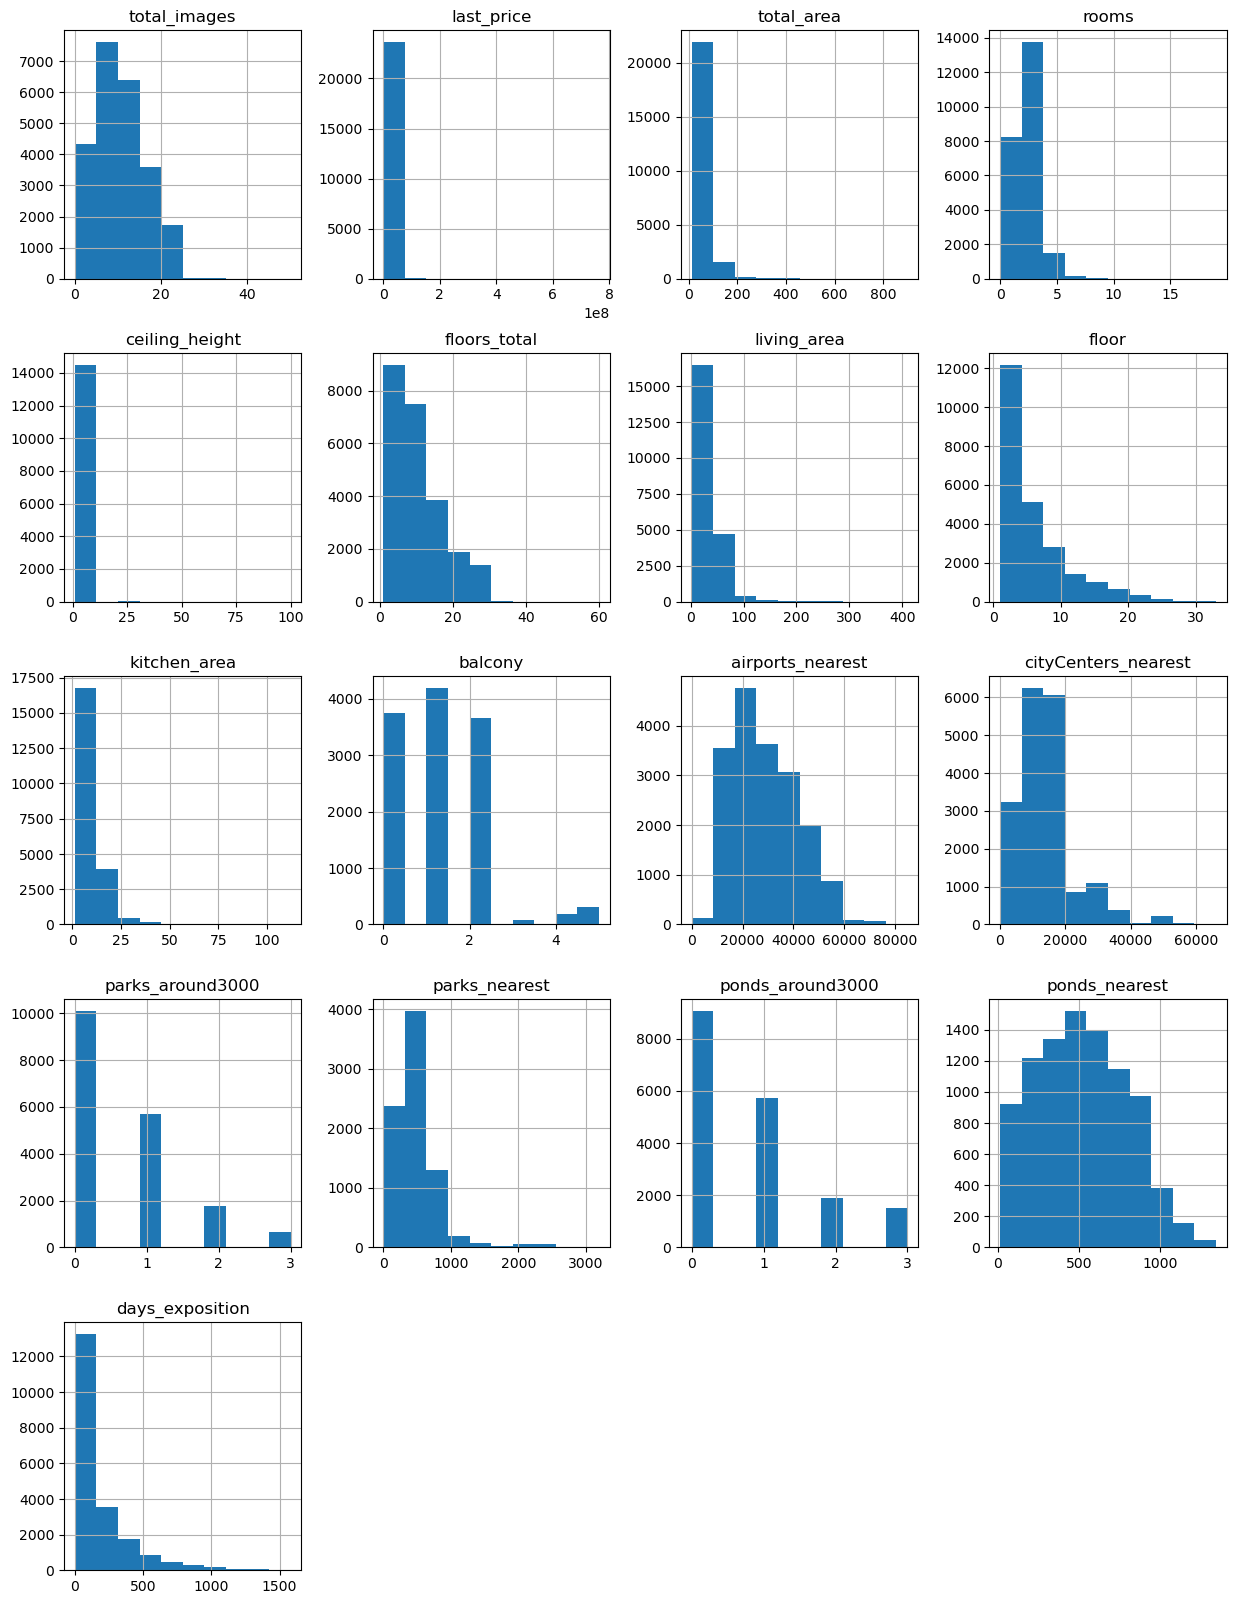

In [8]:
data.hist(figsize=(15, 20));

**Вывод:** Всего у нас 23699 записи. Для целого ряда столбцов есть пропущенные значения и некорректный тип данных. По ряду признаков есть аномальные значения.

### Предобработка данных

**Пропущенные значения**

In [9]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Количество обнаруженных Null из 23699, проанализировав данные можно сделать соответсвующие выводы:

* first_day_exposition - object - должен быть тип datetime
* 9195 ceiling_height - практически в трети объявлений пропущена высота потолков, нулевые значения.
* 86 floors_total - должен быть тип int, т.к. количество этажей - целое значение + нулевые значения.
* 1903 living_area -  нулевые значения, оставим Null.
* 2775 is_apartment - значений, можем предположить что это не апартаменты и присвоить False.
* 2278 kitchen_area - проверить не студия ли это? Если нет, то оставим Null значения.
* 11519 balcony - скорее всего там нет балконов, заполняем 0
* 49 locality_name - данные просто не заполнили, оставим Null
* 5542 airports_nearest - аэропортов рядом нет, оставляем Null
* 5519 city_centers_nearest - центр города не близко, оставляем Null
* 5518 parks_around3000 - тип должен быть int + нулевые значения
* 15620 parks_nearest - значит парков нет, оставляем Null
* 5518 ponds_around3000 - тип должен быть int + нулевые значения
* 14589 ponds_nearest - оставляем Null
* 3181 days_exposition - объявление еще не снято, оставим Null

**Переименуем столбцы в «змеином_регистре»**

In [10]:
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)

**Приводим в целочисленный тип стоимость квартиры**

In [11]:
data['last_price'] = data['last_price'].astype('int')

**Приводим столбец с датой в формат даты без времени, т.к. время не указано**

In [12]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

**Aпартаменты**

Данные о том, является ли квартира апартаментами, заполнены лишь в 2725 случаях из 23699, то есть почти 90% пропусков. Однако, зависимость от того, является ли недвижимость апартаментами или нет не входит в цели данного исследования. Таким образом, можем предположить, что все неуказанные недвижимости апартаментами не являются - обычные жилые квартиры. Заменим пропуски на False.

In [13]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)

Получается так, что все квартиры с пропусками мы сочли не являющимися апартаментами. С одной стороны, это не совсем корректно, с другой стороны, при изначально заполненном параметре только в 10% случаев проводить какой-либо анализ этого параметра было бы бессмысленно. Следует изучить, каким образом проводился сбор данных по этому параметру и сообщить автору данных.

**Приводим в целочисленный тип количество балконов. Заменяем пропущенные значения на 0**

In [14]:
data['balcony'] = data['balcony'].fillna(0)

**Парки и водоёмы в радиусе 3000 м**

Пропуски количества парков и водоёмов можно также считать фактическим отсутствием парков и водоёмов в радиусе 3000 м от недвижимости. Заменим пропущенные значения на нули.
Приводим в целочисленный тип количество парков. Заменяем пропущенные значения на 0

In [15]:
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')

Приводим в целочисленный тип количество прудов. Заменяем пропущенные значения на 0

In [16]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')

**Приводим этажность к целочисленному типу**

In [17]:
data.dropna(subset=['floors_total'], inplace=True)
data['floors_total'] = data['floors_total'].fillna(0).astype('int')

**Создадим функцию, получающую на вход название признака, и возвращающую число пропущенных значений**

In [18]:
def print_nan_ratio(column):
    return print('Пропущено {:.1%}'. format(data[column].isna().value_counts()[1] / len(data), 2) + ' значений')

In [19]:
print_nan_ratio('ceiling_height')
ceiling_medians = data.pivot_table(index='floors_total', values='ceiling_height', aggfunc=['median', 'count'])
ceiling_medians.columns = ['median', 'count']
ceiling_medians.head()

Пропущено 38.6% значений


,median,count
floors_total,,
1,2.80,10
2,2.70,215
3,2.80,399
4,3.00,789
5,2.55,3666


Заменяем оставшиеся пустые значения высоты потолков на медианное значение по всему датасету

In [20]:
for floor in ceiling_medians.index:
    data.loc[(data['floors_total'].isna()) | 
             ((data['floors_total'] == floor) & (ceiling_medians.loc[floor, 'count'] == 0)), 
             'ceiling_height'] = data['ceiling_height'].describe()[5]
for floor in ceiling_medians.index:
    data.loc[(data['ceiling_height'].isna()) & 
             (data['floors_total'] == floor), 
             'ceiling_height'] = ceiling_medians.loc[floor, 'median']

In [21]:
# посчитаем количество пропущенных значений после проделанной замены
data['ceiling_height'].isna().value_counts()

False    23613
Name: ceiling_height, dtype: int64

**Заменяем пустые значения жилой площади и площади кухни**

**Удалем строки с Null locality_name**

In [22]:
data.dropna(subset=['locality_name'], inplace=True)
data['locality_name'] = data['locality_name'].fillna('NaN')

Проверяем количество пропущенных значений

In [23]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

Найдем дубликаты в столбце locality_name

In [24]:
print(data['locality_name'].value_counts())

Санкт-Петербург                    15651
посёлок Мурино                       520
посёлок Шушары                       439
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64


In [25]:
def loc_length():
    return print('Количество уникальных занчений locality_name:', data['locality_name'].unique().shape[0])
loc_length()

Количество уникальных занчений locality_name: 364


Заменяем все "ё" на "е" в наименовании поселков 

In [26]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

Заменяем "городской поселок" на "поселок городского типа"

In [27]:
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')

In [28]:
# check
data.locality_name.nunique()

323

Проверим наличие явных дубликатов

In [29]:
print('Количетво явных дубликатов:', data.duplicated().sum())

Количетво явных дубликатов: 0


### Устранение выбросов

**Площадь**

Посмотрим на распределение значений в total_area

In [30]:
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Строим гистограмму площадей.

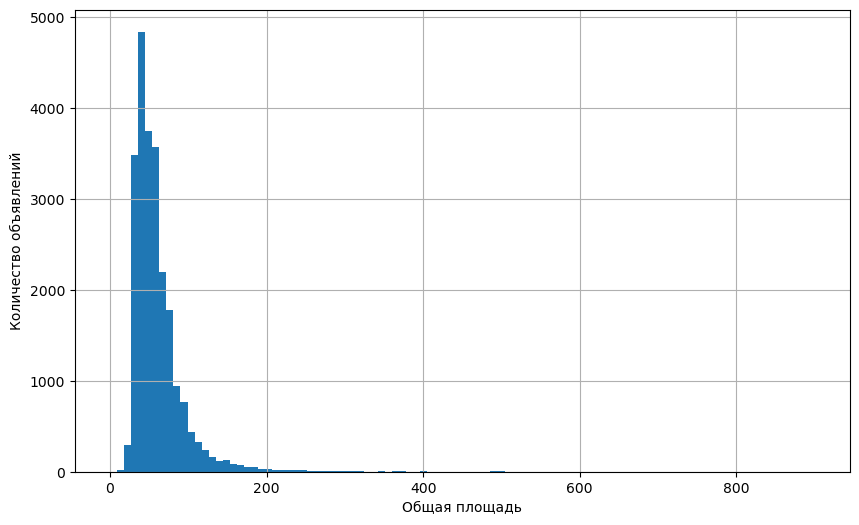

In [31]:
data['total_area'].hist(bins=100, range=(0,900), figsize=(10,6))
plt.xlabel('Общая площадь')
plt.ylabel('Количество объявлений')
plt.show()

Видим значительно выбивающиеся значения в большую сторону. Оценим их количество методом boxplot.
Минимальное же значение в 12 кв. м тоже вызывает вопросы, так как стандартный минимальный метраж — 18 кв. м на 1 человека.

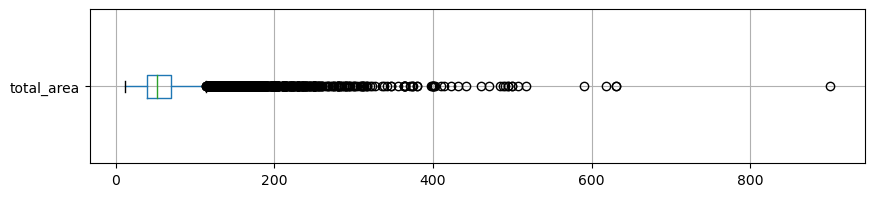

In [32]:
data.boxplot(column='total_area',vert=False,figsize=(10,2))
plt.show()

По гистограмме и боксплоту видим, что значения площади более 300 кв. м значительно выделаются из общего распределения. Предположим, что такие квартиры - высшая точка рынка, в которой зависимости, присущие обычным предложениям, вряд ли действуют. Проверим, можем ли мы от них избавиться - оценим масштаб потери. Будем считать, что потеря до 5% данных допустима.

Посмотрим, сколько всего таких объявлений и оценим процент таких объявлений от общего числа. Ограничим значения снизу значением 18 кв.м., 150 кв.м сверху. В рамках нашего иследования, возьмем максимальную площадь 150 кв.м., все что выше можно считать редкими квартирами. 

In [33]:
print(len(data.query('total_area < 18 or total_area > 150')))
print(len(data.query('total_area < 18 or total_area > 150')) / len(data))

576
0.02444302991725016


Если мы уберём эти значения, потеряем 2,4% начальных данных, что допустимо. Применим метод query. Введём переменную data_filt,  в которой далее будем хранить отфильтрованные данные. Обновлять её будем последовательно с каждой итерацией, чтобы не создавать излишнее количество переменных.

In [34]:
data_filt = data.query('18 <= total_area <= 150')

Обновим гистограмму площадей

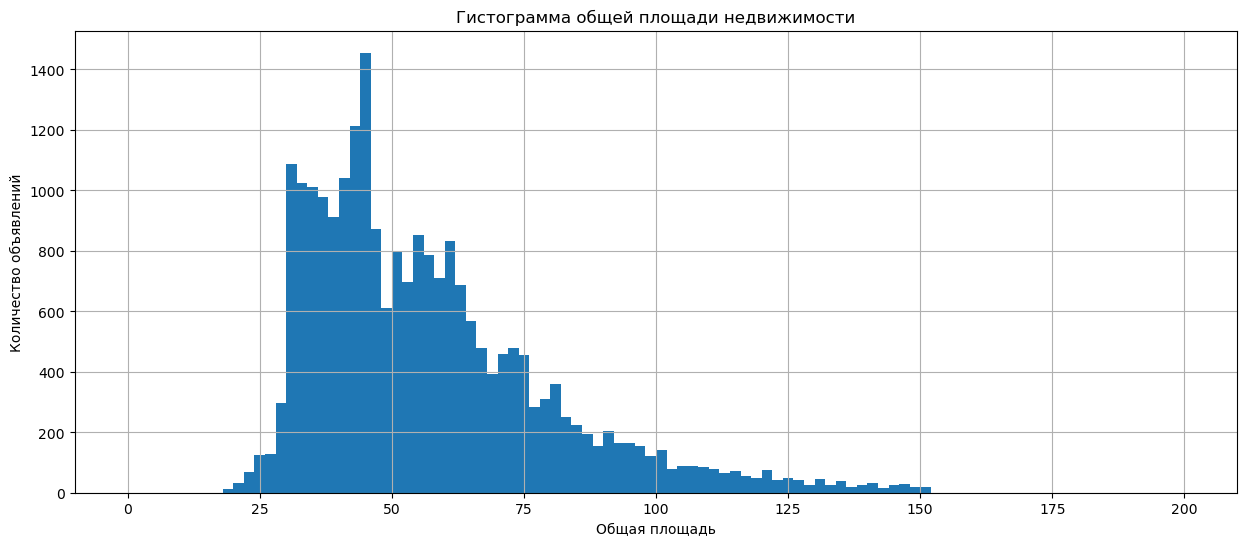

In [35]:
data_filt['total_area'].hist(bins=100, range=(0,200), figsize=(15,6))
plt.title('Гистограмма общей площади недвижимости')
plt.xlabel('Общая площадь')
plt.ylabel('Количество объявлений')
plt.show()

Выглядит гораздо лучше,напоминает распределение Пуассона.

Минимальную площадь имеют единичные студии от 18 м2, наиболее распространены площади от 25 до 50 м2, от 50 до 70, что можно соотнести с популяярностью 1 и 2-комнатных квартир, меньшей популярностью пользуются квартиры от 70 м2, далее с ростом площади количество объявлений стремится к нулю.

**Жилая площадь**

В соответствии с Жилищным кодексом РФ, размер жилой площади, приходящейся на одного человека, не может быть меньше 12 квадратных метров. Исходя из этого сделаем расчет. 

In [36]:
data_filt['living_area'].describe()

count    21197.000000
mean        32.340257
std         15.421477
min          2.000000
25%         18.500000
50%         30.000000
75%         41.600000
max        128.000000
Name: living_area, dtype: float64

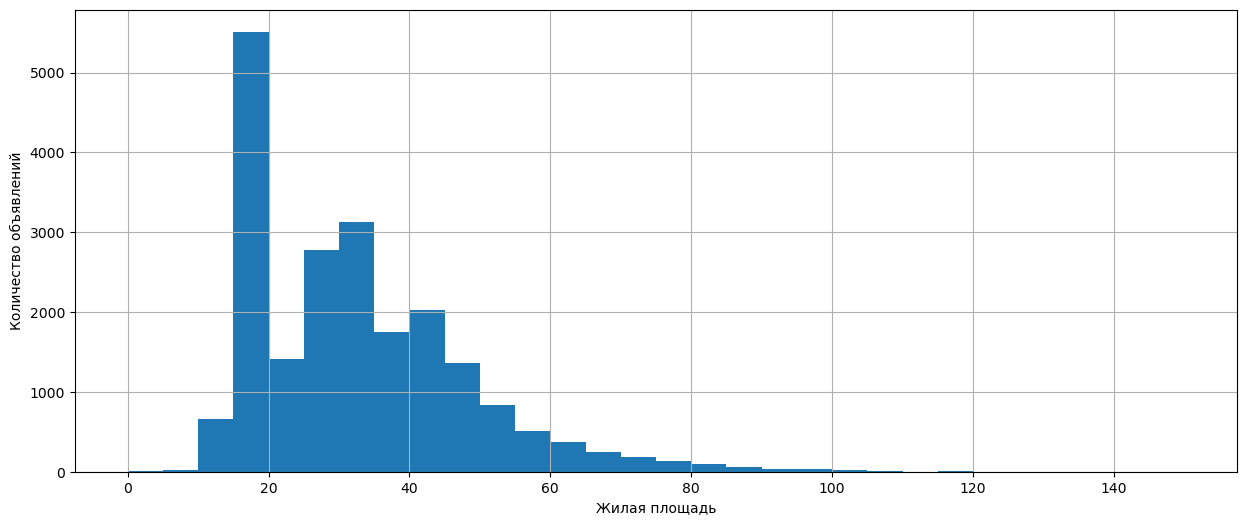

Жилая площадь меньше 12 кв.м.:  128
Жилая площадь больше общей:  0
Жилая площадь больше 150:  119


In [37]:
data_filt['living_area'].hist(bins=30, range=(0,150), figsize=(15,6))
plt.xlabel('Жилая площадь')
plt.ylabel('Количество объявлений')
plt.show()

print('Жилая площадь меньше 12 кв.м.: ',data.query('living_area < 12')['living_area'].count())
print('Жилая площадь больше общей: ',data.query('living_area > total_area')['living_area'].count())
print('Жилая площадь больше 150: ',data.query('living_area > 150')['living_area'].count())

Имеем большое количество квартир с жилой площадью от 12 до 60 кв.м.

Здесь интерсуют квартиры с жилой площадью меньше 12 кв.м. их 128!

Отбросим значения с жилой площадью меньше 12кв.м.
Отбросим квартиры с площадью более 150 кв.м.

#### check nan

In [38]:
# check
data_filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22989 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22989 non-null  int64         
 1   last_price            22989 non-null  int32         
 2   total_area            22989 non-null  float64       
 3   first_day_exposition  22989 non-null  datetime64[ns]
 4   rooms                 22989 non-null  int64         
 5   ceiling_height        22989 non-null  float64       
 6   floors_total          22989 non-null  int32         
 7   living_area           21197 non-null  float64       
 8   floor                 22989 non-null  int64         
 9   is_apartment          22989 non-null  bool          
 10  studio                22989 non-null  bool          
 11  open_plan             22989 non-null  bool          
 12  kitchen_area          20848 non-null  float64       
 13  balcony         

In [39]:
data_filt = data_filt.query('living_area.isna() | 12 <= living_area <= 150')

In [40]:
# check
data_filt.shape[0]

22865

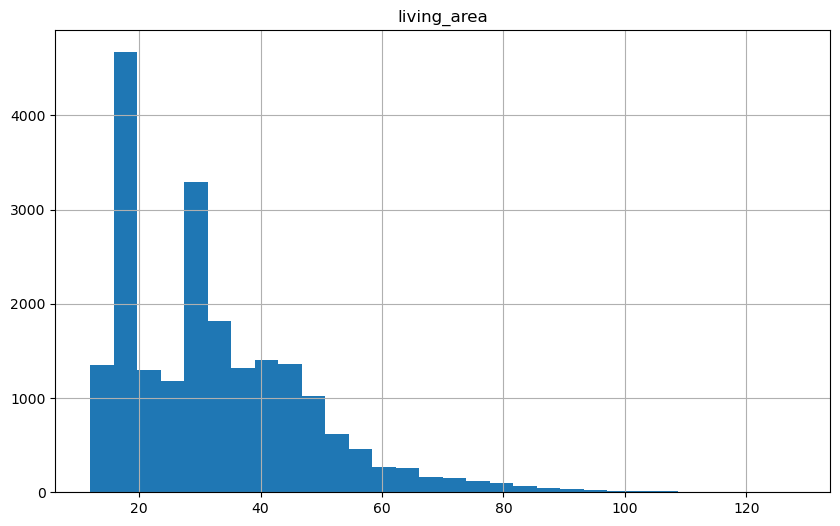

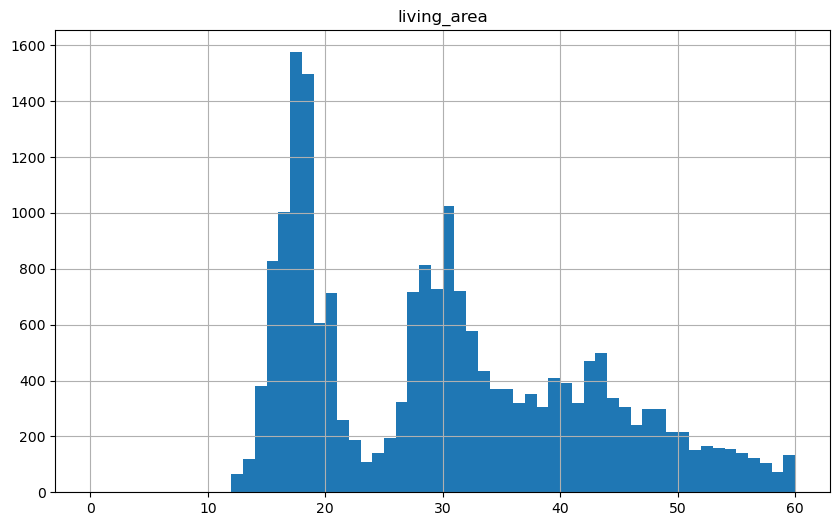

In [41]:
data_filt.hist('living_area', bins=30, figsize=(10,6));
data_filt.hist('living_area', bins=60, range=(0,60), figsize=(10,6));

**Цена квартиры**

Посмотрим на распределение значений в данных

In [42]:
print('Квартир стоимостью 0:', data_filt.query('last_price == 0')['last_price'].count())
print('Квартир стоимостью меньше 400.000:', data_filt.query('last_price < 4e+05')['last_price'].count())
print('Квартир стоимостью больше 100.000.000:', data_filt.query('last_price > 1e+08')['last_price'].count())

Квартир стоимостью 0: 0
Квартир стоимостью меньше 400.000: 1
Квартир стоимостью больше 100.000.000: 2


In [43]:
data_filt['last_price'].describe()

count    2.286500e+04
mean     5.702015e+06
std      4.521976e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.599000e+06
75%      6.525000e+06
max      1.240000e+08
Name: last_price, dtype: float64

Строим гистограмму цены

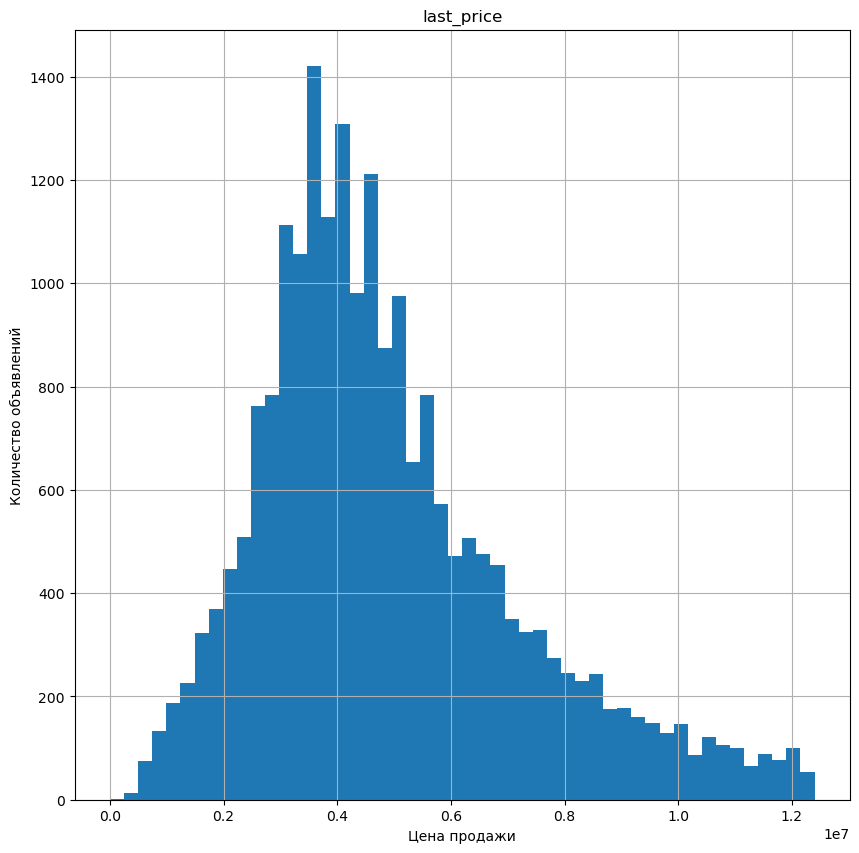

In [44]:
data_filt.hist('last_price', bins=50, range=(0,1.240000e+07), figsize=(10,10))
plt.xlabel('Цена продажи')
plt.ylabel('Количество объявлений')
plt.show()

Здесь так же имеются выбивающиеся из общего распределения значения. Применим метод boxplot.

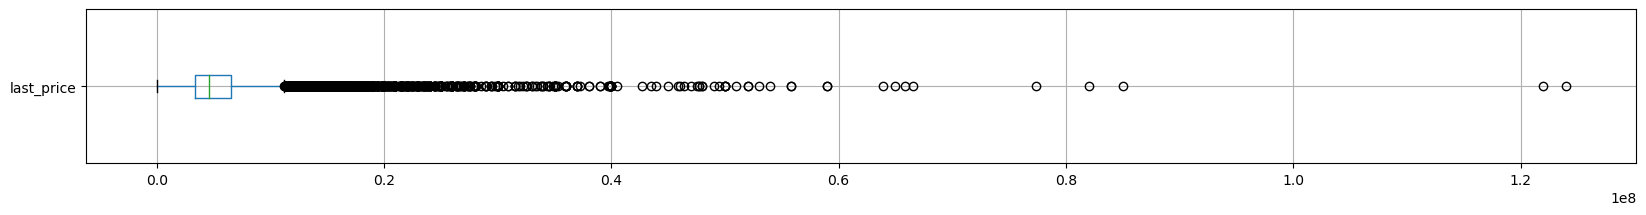

In [45]:
data_filt.boxplot(column='last_price',vert=False,figsize=(20,2))
plt.show()

Убираем слишком дорогие квартиры стоимостью больше 100.000.000 и слишком дешевые ниже 100.000.

In [46]:
data_filt.drop(index=data_filt.query('last_price < 1e+05').index,inplace=True)
data_filt.drop(index=data_filt.query('last_price > 1e+08').index,inplace=True)

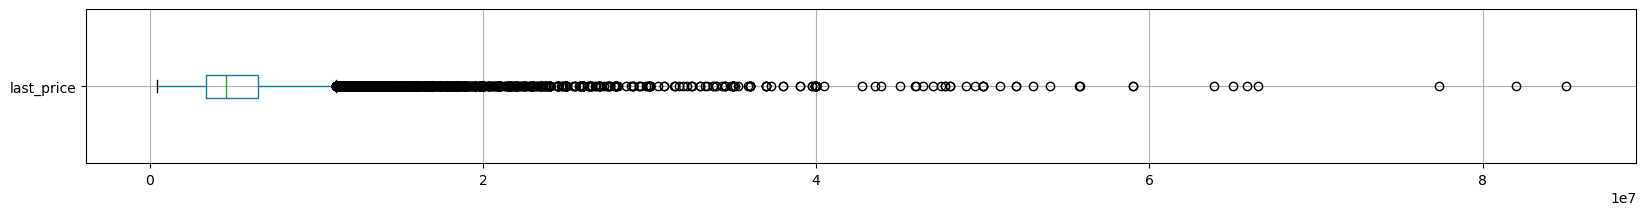

In [47]:
data_filt.boxplot(column='last_price',vert=False,figsize=(20,2));

Исходя из получившихся данных, думаю что можно еще убрать число квартир стоимостью выше 40.000.000.

In [48]:
print('Квартир стоимостью больше 40.000.000:', data_filt.query('last_price > 4e+07')['last_price'].count())

Квартир стоимостью больше 40.000.000: 36


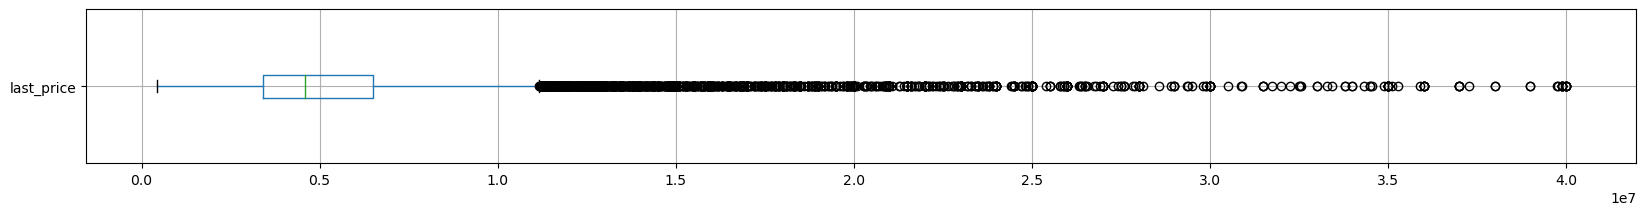

In [49]:
data_filt.drop(index=data_filt.query('last_price > 4e+07').index,inplace=True)
data_filt.boxplot(column='last_price',vert=False,figsize=(20,2));

In [50]:
data_filt['last_price'].describe()

count    2.282600e+04
mean     5.616182e+06
std      3.930508e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.590000e+06
75%      6.500000e+06
max      4.000000e+07
Name: last_price, dtype: float64

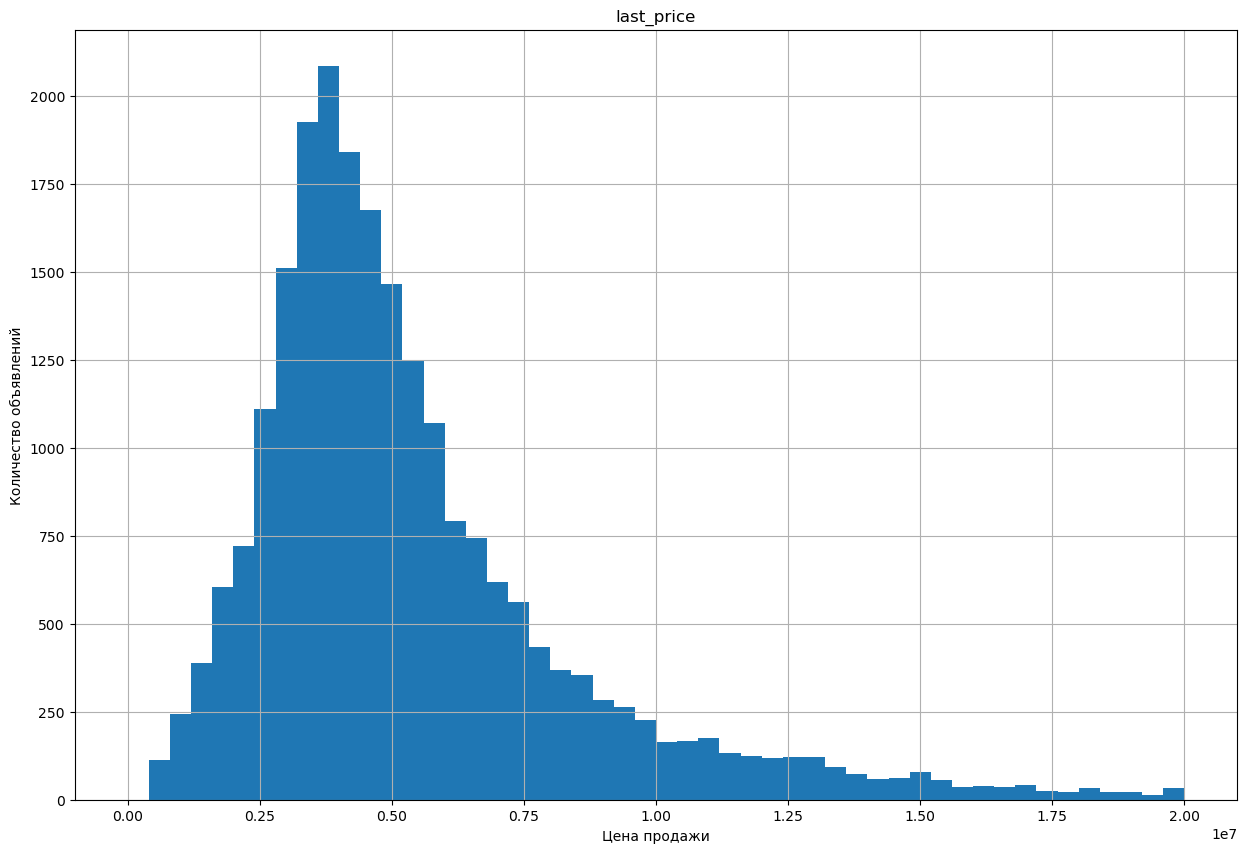

In [51]:
data_filt.hist('last_price', bins=50, range=(0,2e+07), figsize=(15,10))
plt.xlabel('Цена продажи')
plt.ylabel('Количество объявлений')
plt.show()

Получили более наглядное распределение. Середина располагается от 1 млн руб. с пиком в районе 4 млн руб. и со снижением предложений до 10 млн руб., дальнейшие объявления по цене единичны.

**Количество комнат**

Посмотрим на распределение значений

In [52]:
data_filt['rooms'].describe()

count    22826.000000
mean         2.004381
std          0.948338
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

Строим гистограмму количества комнат

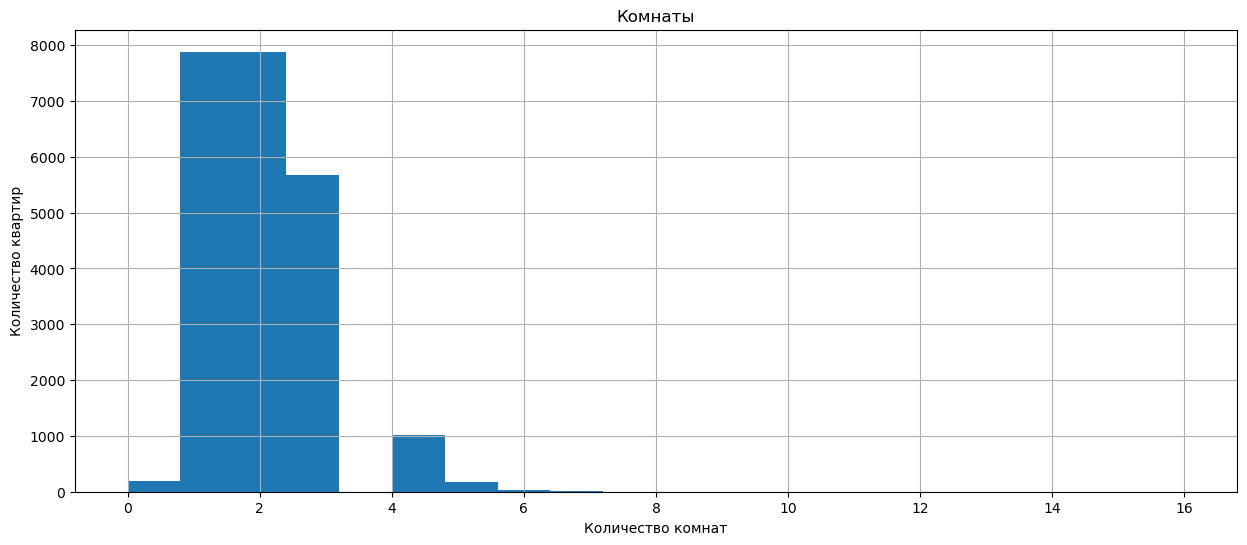

Наибольшие по числу комнат варианты:
8758     8
17991    7
855      7
21689    7
15196    7
17350    7
22264    7
14603    7
4159     7
14649    6
Name: rooms, dtype: int64


In [53]:
data_filt['rooms'].hist(bins=20, range=(0,16), figsize=(15,6))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по числу комнат варианты:')
print(data_filt['rooms'].sort_values(ascending=False).head(10))

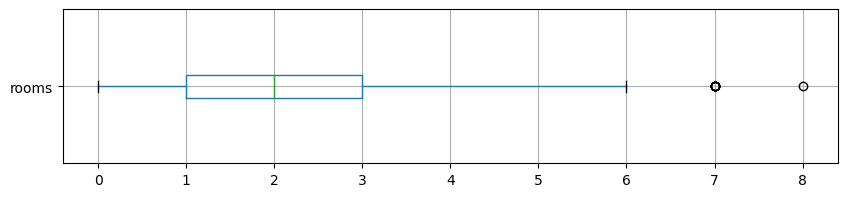

In [54]:
data_filt.boxplot(column='rooms',vert=False,figsize=(10,2))
plt.show()

Уберем объявления, где колличество комнат более 6, они выбиваются из общих распределений. 

In [55]:
data_filt = data_filt.query('rooms <= 6')

Объявления с количеством комнат, равным 0, скорее всего это относится к квартирам со свободной планировкой и студиям. Оставим их без изменения.

Строим гистограмму количества комнат

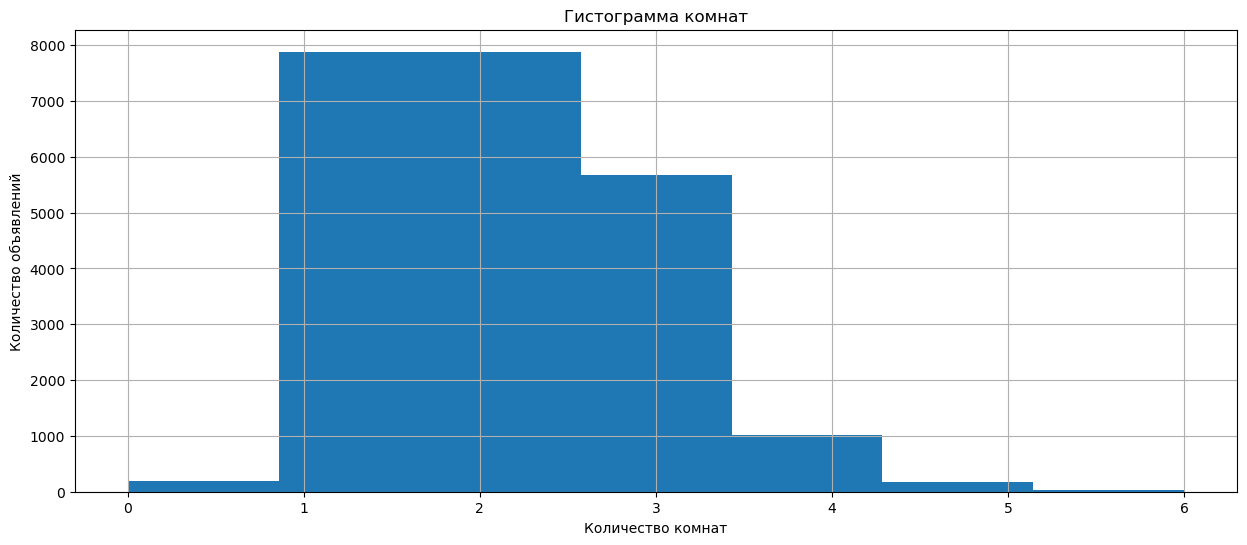

In [56]:
data_filt['rooms'].hist(bins=7, range=(0,6), figsize=(15,6))
plt.title('Гистограмма комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.show()

В основном популярностью пользуются 1- и 2-комнатные квартиры, менее популярны 3-комнатные, а студии, свободные планировки и кварианты с 4 и более комнатами на рынке представлены значительно меньше.

**Всего этажей в доме**

Посмотрим на распределение значений в floors_total

In [57]:
data_filt['floors_total'].describe()

count    22817.000000
mean        10.737082
std          6.607204
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [58]:
print('Квартир в одноэтажных домах : ',data_filt.query('floors_total == 1')['floors_total'].count())
print('Квартир в 30+ этажных домах : ',data_filt.query('floors_total > 30')['floors_total'].count())

Квартир в одноэтажных домах :  25
Квартир в 30+ этажных домах :  31


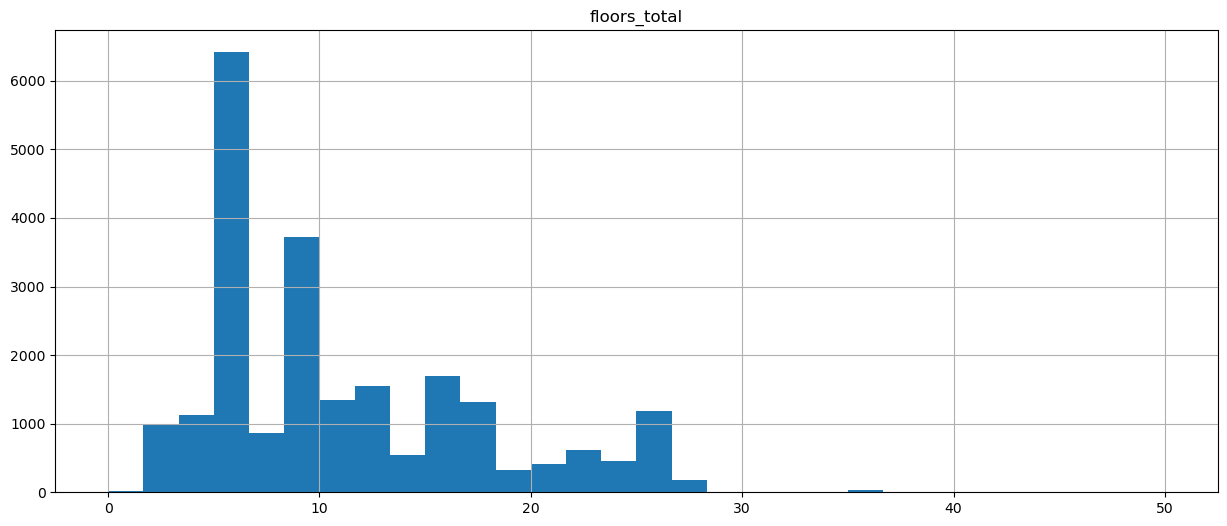

In [59]:
data_filt.hist('floors_total', bins=30, range=(0,50), figsize=(15,6));

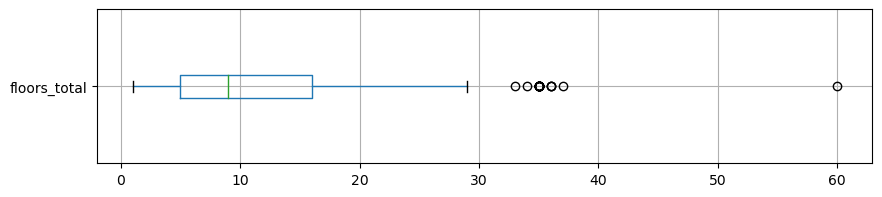

In [60]:
data_filt.boxplot(column='floors_total',vert=False,figsize=(10,2))
plt.show()

Я не очень знакома с архитектурой Санкт-Петербурга, но квартиры в одноэтажных домах вызывают у меня подозрение. Но на данном этапе исходя из полученых данных, уберем выброс свыше 30 этажей. 

In [61]:
data_filt = data_filt.query('floors_total <= 30')

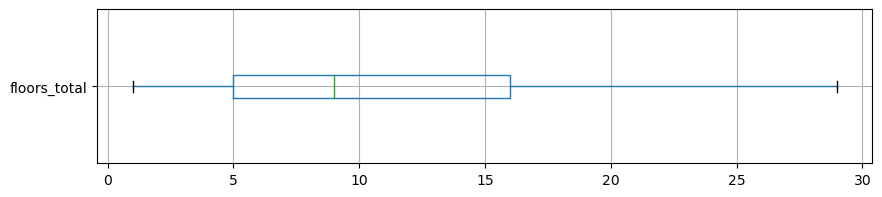

In [62]:
data_filt.boxplot(column='floors_total',vert=False,figsize=(10,2))
plt.show()

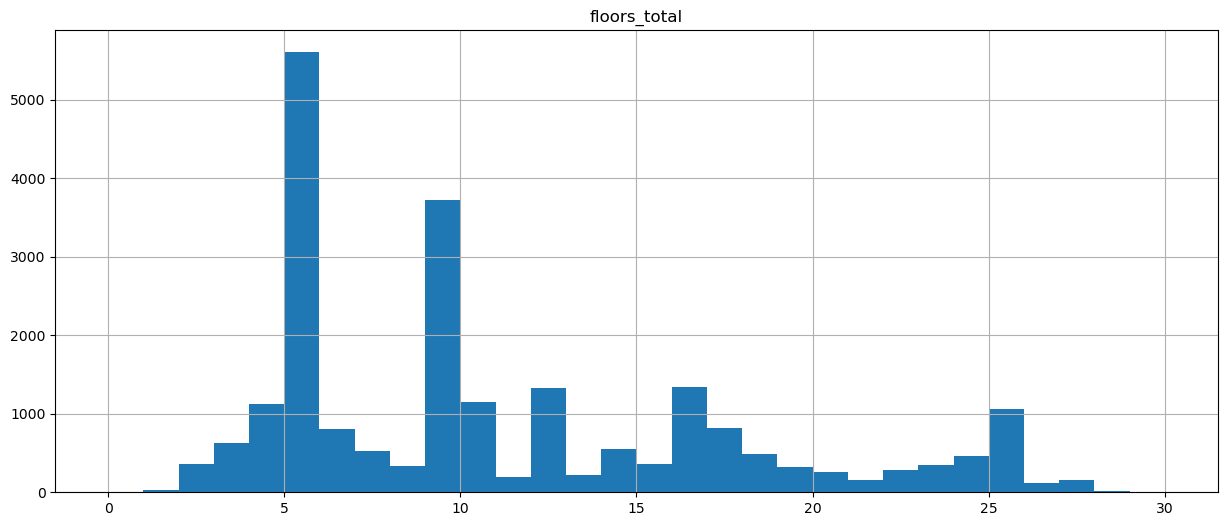

In [63]:
data_filt.hist('floors_total', bins=30, range=(0,30), figsize=(15,6));

Больше всего 5-ти и 9-ти этажных домов, далее этажность домов снижается. Подразумеваю, что все что выше 15 этажей это новостройки. 

**Высота потолков**

Посмотрим на распределение значений в ceiling_height

In [64]:
data_filt['ceiling_height'].describe()

count    22786.000000
mean         2.724899
std          0.993342
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

Сразу построим боксплот, т.к. потолки в 1 и 100 м крайне подозрительны.

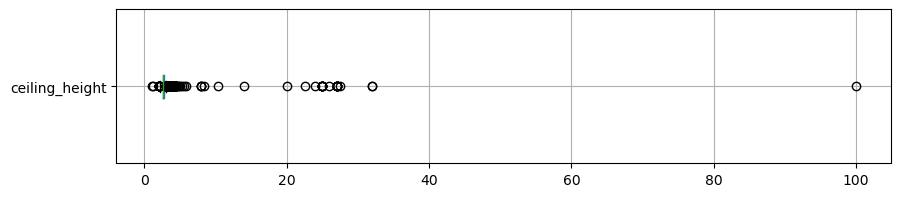

In [65]:
data_filt.boxplot(column='ceiling_height',vert=False,figsize=(10,2))
plt.show()

Высота потолков в жилых домах устанавливается с учетом минимальных требований, установленных СНиПом и комфортного пребывания в нем.

Независимо от года постройки и от типа здания, высота от пола до потолка должна быть в пределах 2,5-3,2 метров. Два с половиной метра это минимум, у человека не должно присутствовать такого ощущения, что потолок давит на него сверху. В коридоре, в прихожих,в холлах - 2,1 метра.

Ограничим значения снизу значением 2.1 метра, сверху - 5 метрами, т.к. это видно по боксплоту.

In [66]:
print(len(data_filt.query('ceiling_height < 2.1 or ceiling_height > 5')))
print(len(data_filt.query('ceiling_height < 2.1 or ceiling_height > 5')) / len(data))

44
0.0018671758964566095


Ограничения адекватны, отбросим выбивающиеся значения.

In [67]:
data_filt = data_filt.query('2.1 <= ceiling_height <= 5')

Строим гистограмму высоты потолков.

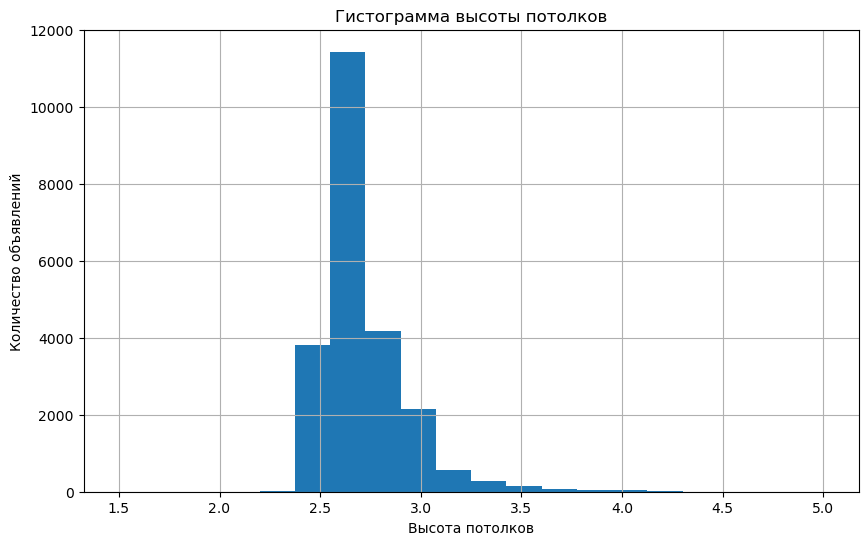

In [68]:
data_filt['ceiling_height'].hist(bins=20, range=(1.5,5), figsize=(10,6))
plt.title('Гистограмма высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество объявлений')
plt.show()

Получили ожидаемое распределение, совпадающее с реальной ситуацией с высотами потолков квартир - минимальная распространённая высота составляет 2.5 метра, пик приходится на "стандартные" 2.7 метра, реже встречаются высоты в районе 3 м и выше.

**Площадь кухни**

Посмотрим на распределение значений в kitchen_area

In [69]:
data_filt['kitchen_area'].describe()

count    20636.000000
mean        10.138903
std          4.830064
min          1.300000
25%          7.000000
50%          9.000000
75%         11.500000
max         64.000000
Name: kitchen_area, dtype: float64

In [70]:
print('Площадь кухни меньше 3 кв.м.: ',data_filt.query('kitchen_area < 3')['living_area'].count())
print('Площадь кухни 5 кв.м.: ',data_filt.query('kitchen_area == 5')['living_area'].count())
print('Площадь кухни больше 50 кв.м.: ',data_filt.query('kitchen_area > 50')['living_area'].count())

Площадь кухни меньше 3 кв.м.:  10
Площадь кухни 5 кв.м.:  350
Площадь кухни больше 50 кв.м.:  12


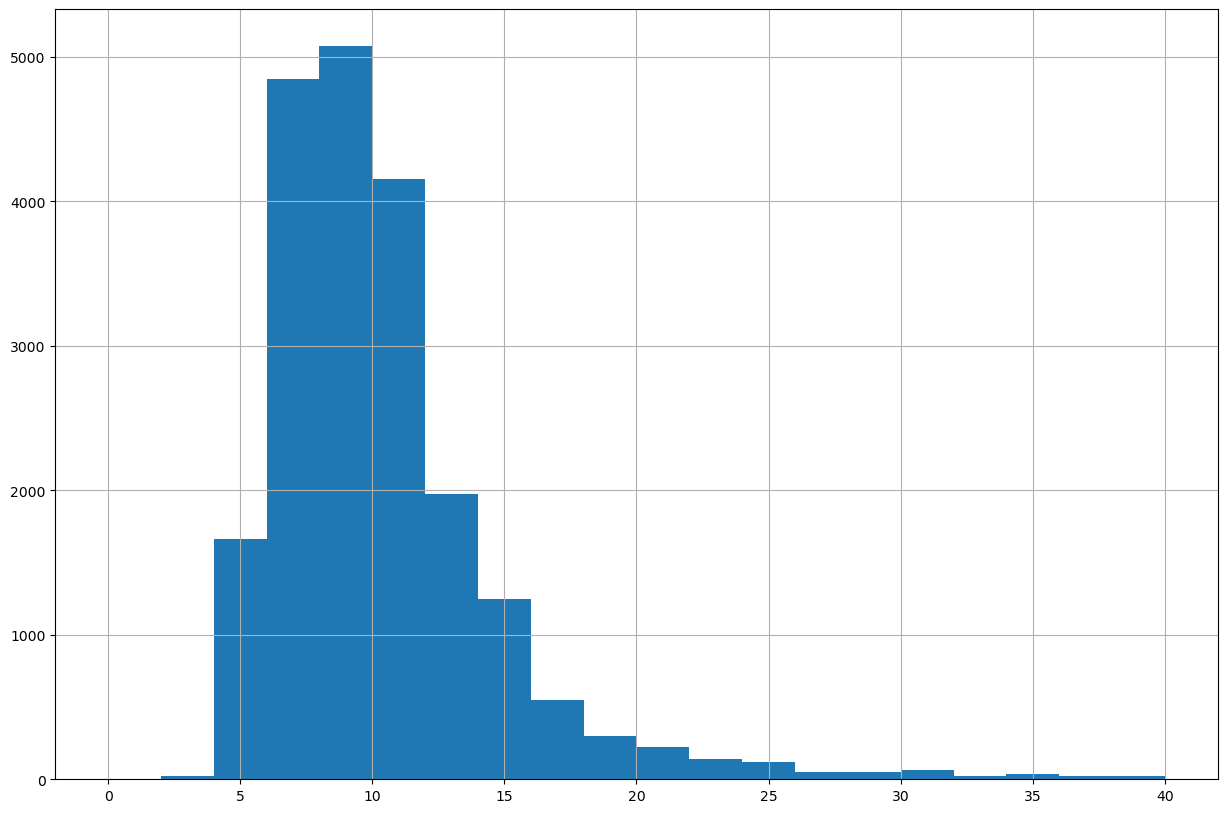

In [71]:
data_filt['kitchen_area'].hist(bins=20, range=(0,40), figsize=(15,10));

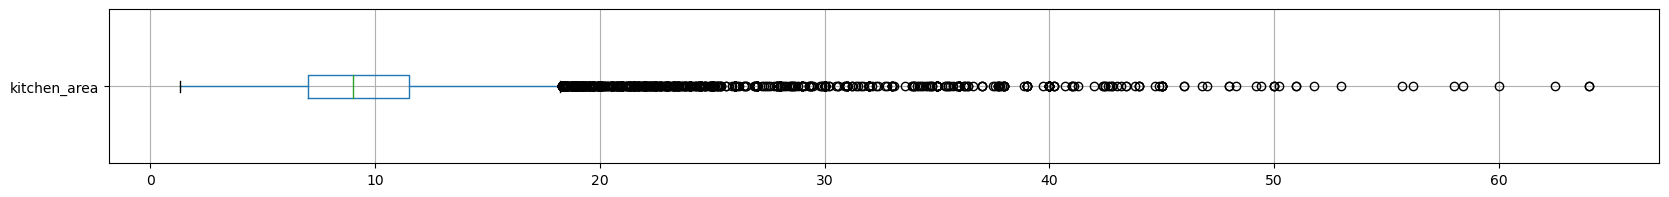

In [72]:
data_filt.boxplot(column='kitchen_area',vert=False,figsize=(20,2));

Есть одна квартира с площадью кухни меньше 1 кв. метра - это явно аномалия.
Больше всего кухонь с площадью 5 кв.м. Кухонь с площадью более 30 кв.м. довольно мало.

Вывод - удалим строки с кухнями менее 2кв.м. и больше 45кв.м.

#### check nan

In [73]:
# check
data_filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22742 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22742 non-null  int64         
 1   last_price            22742 non-null  int32         
 2   total_area            22742 non-null  float64       
 3   first_day_exposition  22742 non-null  datetime64[ns]
 4   rooms                 22742 non-null  int64         
 5   ceiling_height        22742 non-null  float64       
 6   floors_total          22742 non-null  int32         
 7   living_area           20957 non-null  float64       
 8   floor                 22742 non-null  int64         
 9   is_apartment          22742 non-null  bool          
 10  studio                22742 non-null  bool          
 11  open_plan             22742 non-null  bool          
 12  kitchen_area          20636 non-null  float64       
 13  balcony         

In [74]:
data_filt = data_filt.query('kitchen_area.isna() | 3 <= kitchen_area <= 45')

In [75]:
# check
data_filt.shape[0]

22707

Проверяем что получилось 

In [76]:
data_filt['kitchen_area'].describe()

count    20601.000000
mean        10.091307
std          4.594808
min          3.000000
25%          7.000000
50%          9.000000
75%         11.500000
max         45.000000
Name: kitchen_area, dtype: float64

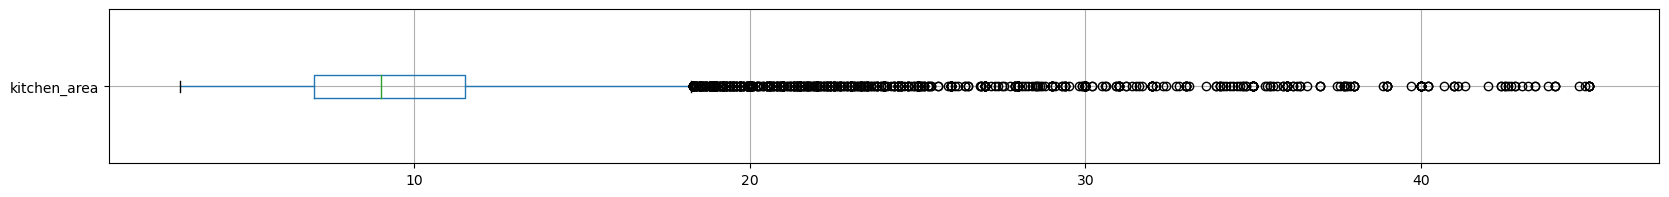

In [77]:
data_filt.boxplot(column='kitchen_area',vert=False,figsize=(20,2));

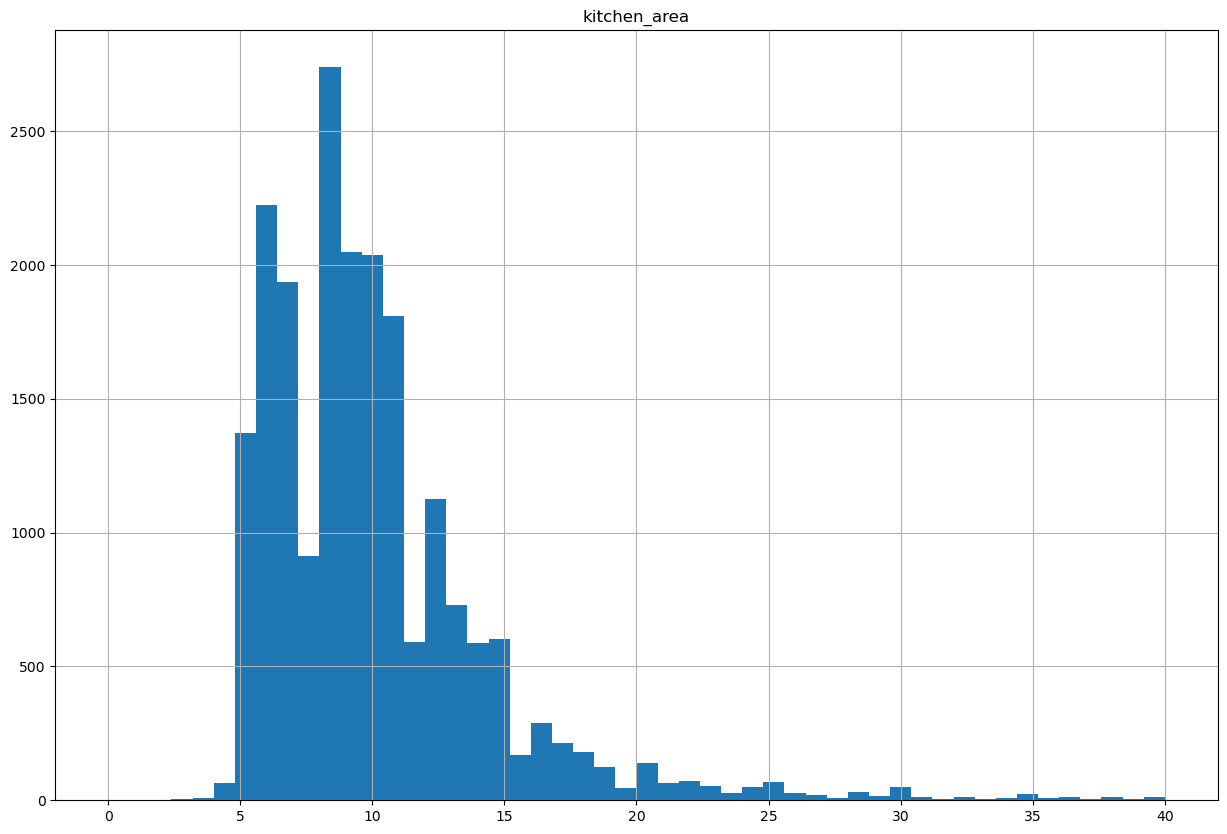

In [78]:
data_filt.hist('kitchen_area', bins=50, range=(0,40), figsize=(15,10));

В основном площадь кухонь в Санкт-Петербурге варьируется от 5 кв.м. до 15 кв.м. От 15 кв.м. до 20 кв.м. уже реже. И далее уже реже, но площадь привышает 30 кв.м.

**Уберем выбросы в days_exposition**

Посмотрим на распределение значений в days_exposition

In [79]:
data_filt['days_exposition'].describe()

count    19729.000000
mean       178.126261
std        217.288992
min          1.000000
25%         44.000000
50%         94.000000
75%        226.000000
max       1580.000000
Name: days_exposition, dtype: float64

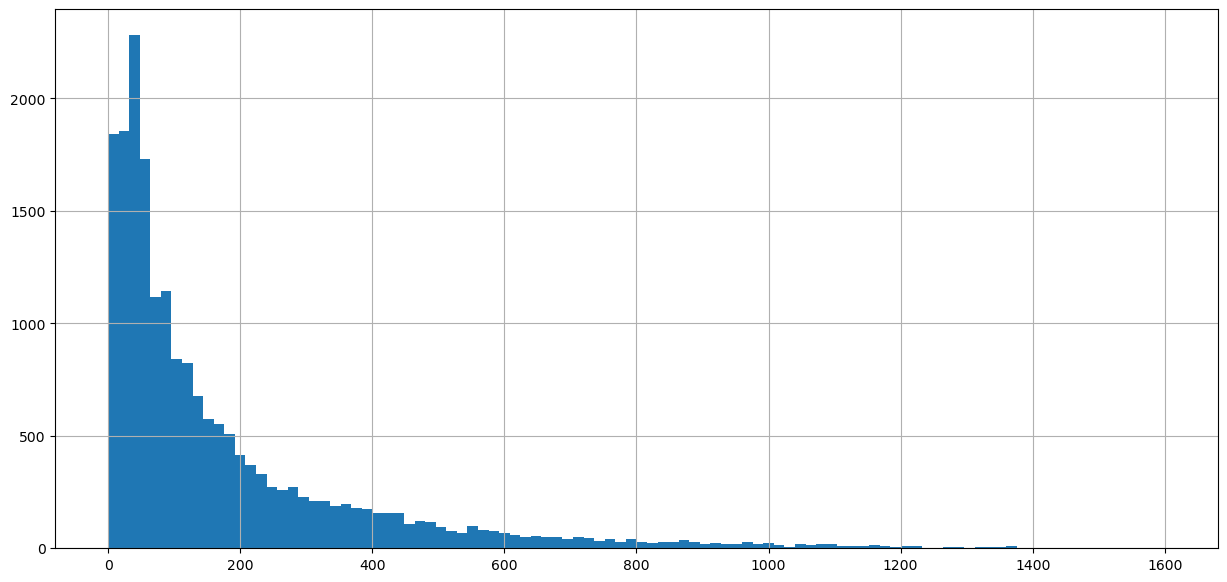

In [80]:
data_filt['days_exposition'].hist(bins=100, range=(0,1600), figsize=(15,7));

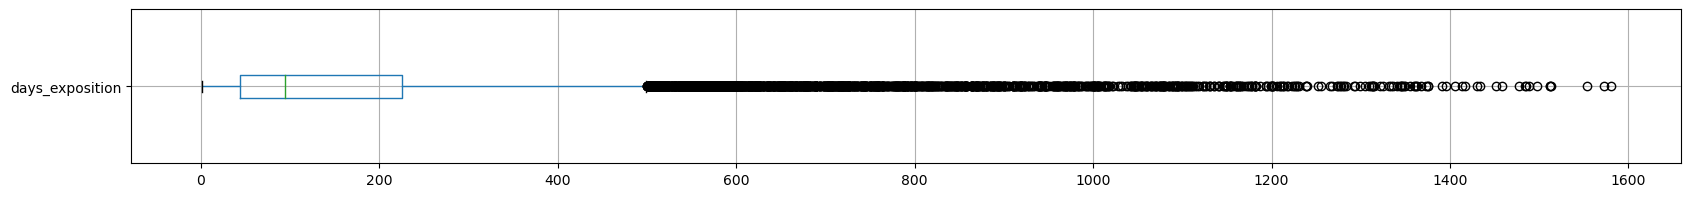

In [81]:
data_filt.boxplot(column='days_exposition',vert=False,figsize=(20,2));

Сделаем предположение, что адекватный срок жизни "живого" объявления вряд ли превысит 2 года (или 730 дней). Оценим их количество.

In [82]:
print(len(data_filt.query('days_exposition > 730')))
print(len(data_filt.query('days_exposition > 730')) / len(data))

705
0.02991725015913431


Хотя срок объявления 2 года весьма сомнителен, можно предположить, что оно либо перестало быть интересным автору, либо квартира уже продана, а объявление забыто, но это тоже мало вероятно так как продление объявления платное. Либо присутствует ошибка в сборе данных или ведении статистики срока жизни объявлений. С этим можно обратиться к автору данных.

Сократим данные:

In [83]:
data_filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22707 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22707 non-null  int64         
 1   last_price            22707 non-null  int32         
 2   total_area            22707 non-null  float64       
 3   first_day_exposition  22707 non-null  datetime64[ns]
 4   rooms                 22707 non-null  int64         
 5   ceiling_height        22707 non-null  float64       
 6   floors_total          22707 non-null  int32         
 7   living_area           20924 non-null  float64       
 8   floor                 22707 non-null  int64         
 9   is_apartment          22707 non-null  bool          
 10  studio                22707 non-null  bool          
 11  open_plan             22707 non-null  bool          
 12  kitchen_area          20601 non-null  float64       
 13  balcony         

In [84]:
data_filt = data_filt.query('days_exposition.isna() | days_exposition <= 730')

In [85]:
data_filt.shape[0]

22002

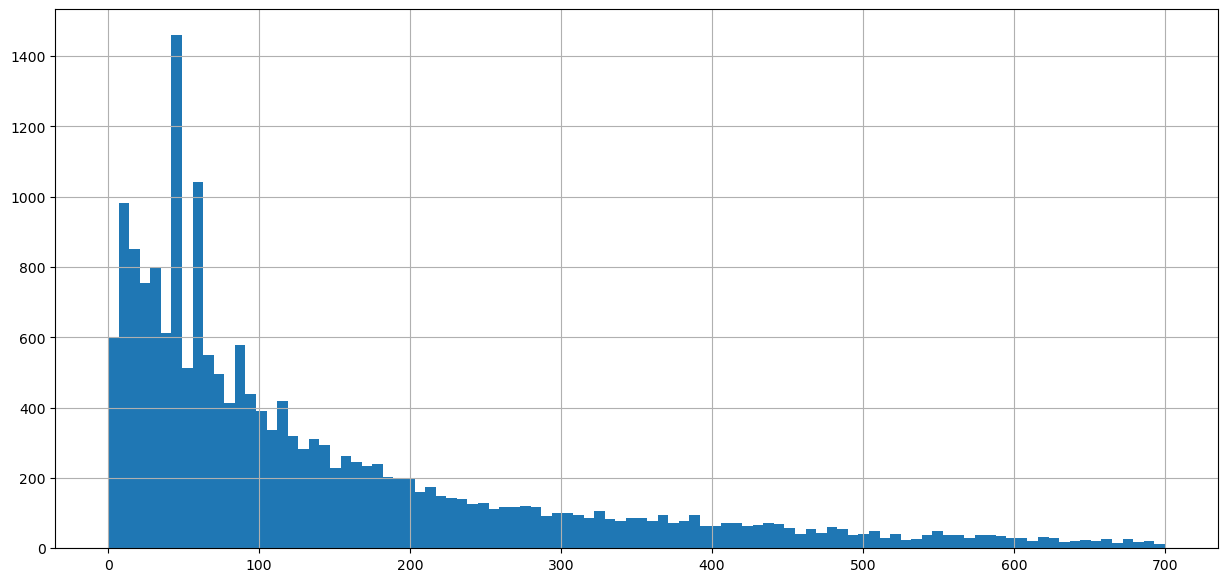

In [86]:
data_filt['days_exposition'].hist(bins=100, range=(0,700), figsize=(15,7));

**Вывод по изученным параметрам**

По пройденному этапу можно сделать следующие выводы:
1. Наиболее распространены квартиры общей площадью от 25 до 70 м2.
2. Квартиры с жилой площадью от 15 до 50 м2. наиболее востребованны.
3. Основная масса квартир укладывается в 10 млн руб. со средним значением около 4 млн руб.
4. Самые популярные 1- и 2-комнатные квартиры, далее следуют 3-комнатные.
5. Больше всего 5-ти и 9-ти этажных домов.
6. Наиболее распространены квартиры с потолками высотой стандартные 2.7 м.
7. Самая распространенная площадь кухонь в Санкт-Петербурге от 5 кв.м. до 15 кв.м.

#### check gap

In [87]:
# check
data_filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22002 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22002 non-null  int64         
 1   last_price            22002 non-null  int32         
 2   total_area            22002 non-null  float64       
 3   first_day_exposition  22002 non-null  datetime64[ns]
 4   rooms                 22002 non-null  int64         
 5   ceiling_height        22002 non-null  float64       
 6   floors_total          22002 non-null  int32         
 7   living_area           20262 non-null  float64       
 8   floor                 22002 non-null  int64         
 9   is_apartment          22002 non-null  bool          
 10  studio                22002 non-null  bool          
 11  open_plan             22002 non-null  bool          
 12  kitchen_area          19941 non-null  float64       
 13  balcony         

In [88]:
# check
data.rooms.value_counts().to_frame()

,rooms
1,8004
2,7897
3,5779
4,1172
5,325
0,194
6,104
7,59
8,12
9,8


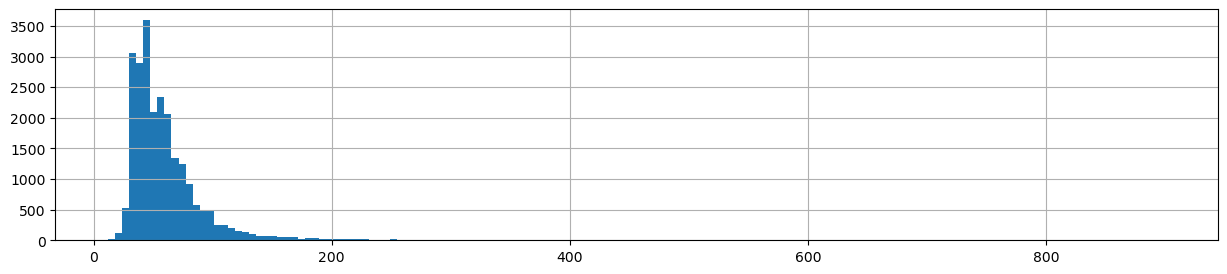

In [89]:
# check
data.total_area.hist(bins = 150, figsize = (15,3));

Все квартиры менее 20-ти и более 250-ти квадратных метров можно считать редкостями.

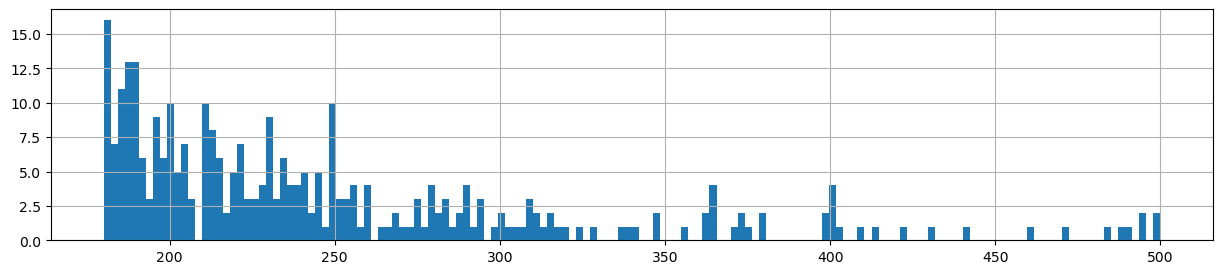

In [90]:
# check
data.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

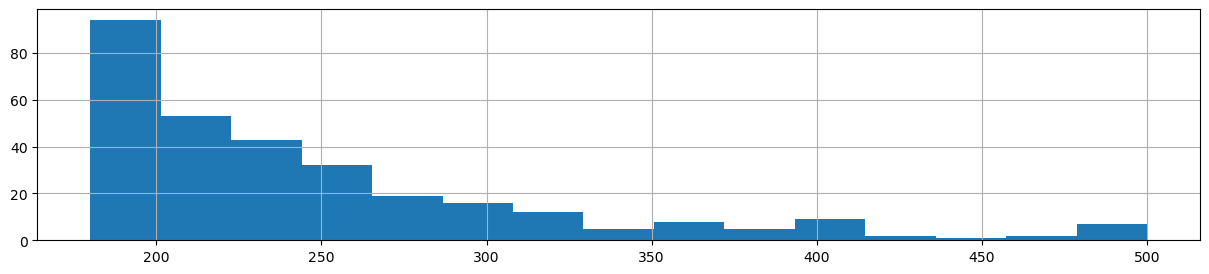

In [91]:
# check
data.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

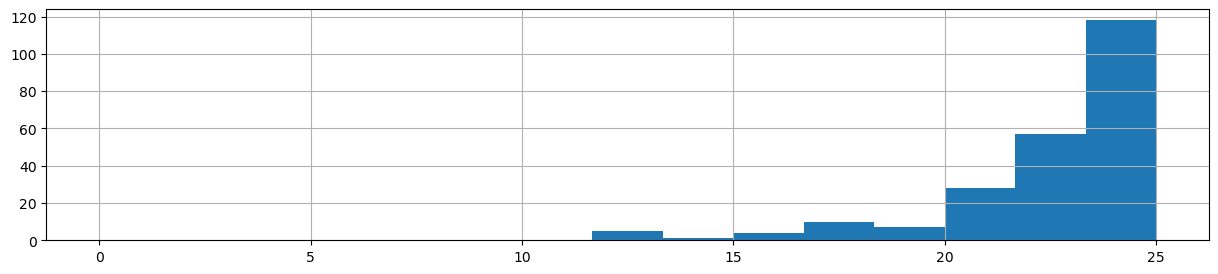

In [92]:
# check
data.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

In [93]:
# check

# было

data.shape[0]

23565

In [94]:
# check

# стало

data_filt.shape[0]

22002

In [95]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.001200,0.00,20.00,2.40,3.00,"561,384.00",10.00,3.80,1.00,2.00
0.010000,1.00,25.32,2.50,4.00,"1,000,000.00",13.00,5.00,1.00,2.00
0.500000,2.00,52.00,2.65,95.00,"4,646,000.00",30.00,9.10,4.00,9.00
0.990000,5.00,197.45,3.60,"1,067.14","36,000,000.00",120.00,35.03,23.00,26.00
0.998800,8.00,380.00,8.00,"1,370.64","124,856,064.00",219.92,60.00,26.00,35.00


### Посчитайте и добавьте в таблицу новые столбцы

#### Добавление столбцов 

Цена одного квадратного метра

In [96]:
data_filt['cost_per_sqm'] = (data_filt['last_price'] / data_filt['total_area']).astype('int')

День публикации объявления (0 - понедельник, 1 - вторник и т.д.)

In [97]:
data_filt['dayofweek'] = data_filt['first_day_exposition'].dt.dayofweek

Месяц публикации объявления

In [98]:
data_filt['month'] = data_filt['first_day_exposition'].dt.month

Год публикации объявления

In [99]:
data_filt['year'] = data_filt['first_day_exposition'].dt.year

Этаж квартиры (первый, последний, другой)

In [100]:
data_filt['floor_category'] = data_filt.apply(
    lambda x: 'первый' if (x.floor == 1) 
    else ('последний' if (x.floor == x.floors_total) & isinstance(x.floors_total,int) 
    else 'другой'), axis=1
)

data_filt['floor_category_digit'] = data_filt.apply(
    lambda x: 0 if (x.floor == 1) 
    else (2 if (x.floor == x.floors_total) & isinstance(x.floors_total,int) 
    else 1), axis=1
)

In [101]:
data_filt['floor_category_digit'].value_counts()

1    16212
2     3041
0     2749
Name: floor_category_digit, dtype: int64

Расстояние в км до центра города

In [102]:
data_filt['city_centers_nearest_km'] = round(data_filt['city_centers_nearest'] / 1000)

Выведем первые 10 строк и посмотрим все ли наместе

In [103]:
data_filt.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,cost_per_sqm,dayofweek,month,year,floor_category,floor_category_digit,city_centers_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2,755.0,NaN,120370,3,3,2019,другой,1,16.0
1,7,3350000,40.40,2018-12-04,1,2.75,11,18.60,1,False,...,0,NaN,81.0,82920,1,12,2018,первый,0,19.0
2,10,5196000,56.00,2015-08-20,2,2.55,5,34.30,4,False,...,2,574.0,558.0,92785,3,8,2015,другой,1,14.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1,48.0,121.0,100000,1,6,2018,другой,1,8.0
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,0,NaN,55.0,95065,0,9,2018,другой,1,NaN
7,5,7915000,71.60,2019-04-18,2,2.75,24,NaN,22,False,...,0,NaN,NaN,110544,3,4,2019,другой,1,12.0
8,20,2900000,33.16,2018-05-23,1,2.70,27,15.43,26,False,...,0,NaN,189.0,87454,2,5,2018,другой,1,NaN
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0,NaN,289.0,88524,6,2,2017,другой,1,15.0
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,False,...,2,553.0,137.0,127525,3,11,2017,другой,1,14.0
11,9,3300000,44.00,2018-08-27,2,2.55,5,31.00,4,False,...,0,NaN,7.0,75000,0,8,2018,другой,1,52.0


#### Время продажи квартир. Как быстро продавались квартиры. Изучение days_exposition

**Количество дней публикации объявления**

Посмотрим на распределение значений в days_exposition

In [104]:
data_filt['days_exposition'].describe()

count    19024.000000
mean       148.998686
std        154.825850
min          1.000000
25%         43.000000
50%         90.000000
75%        203.000000
max        729.000000
Name: days_exposition, dtype: float64

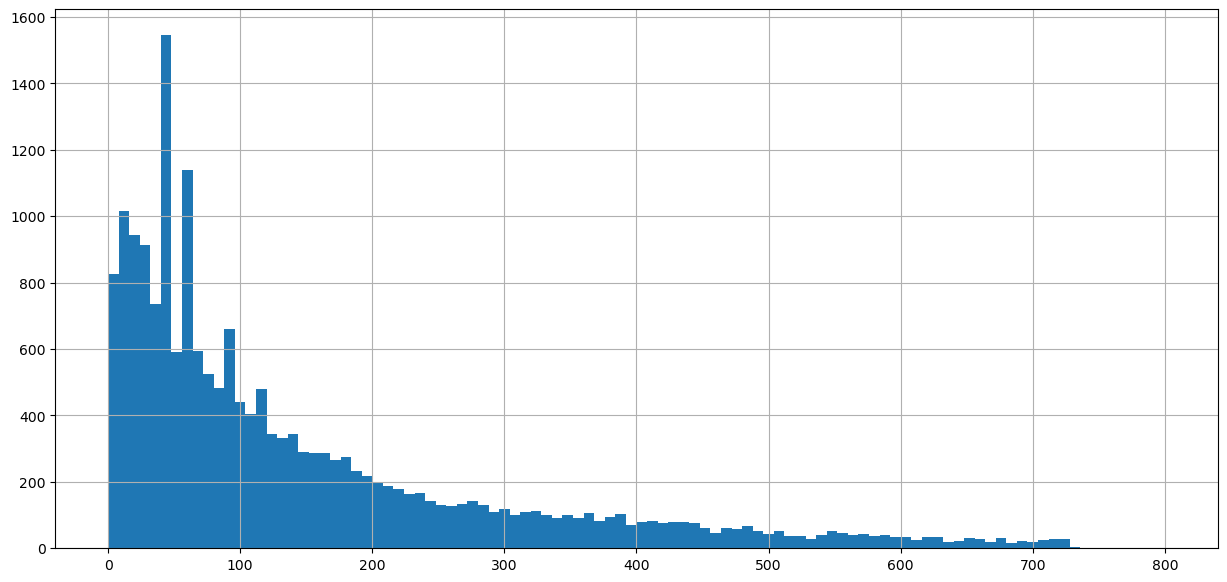

In [105]:
data_filt['days_exposition'].hist(bins=100, range=(0,800), figsize=(15,7));

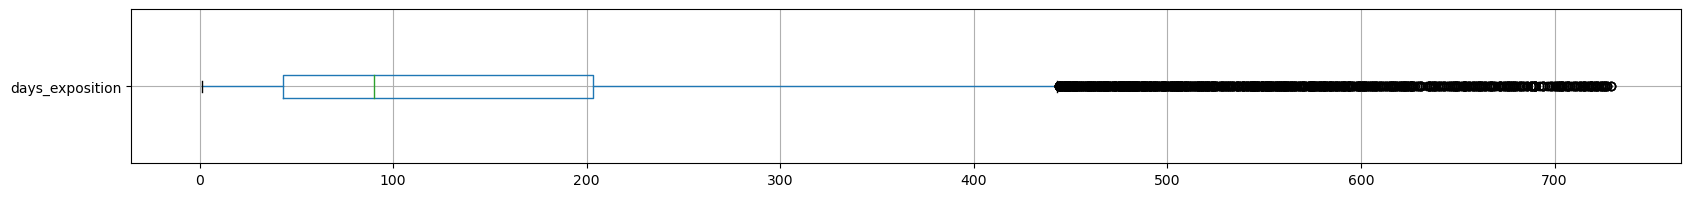

In [106]:
data_filt.boxplot(column='days_exposition',vert=False,figsize=(20,2));

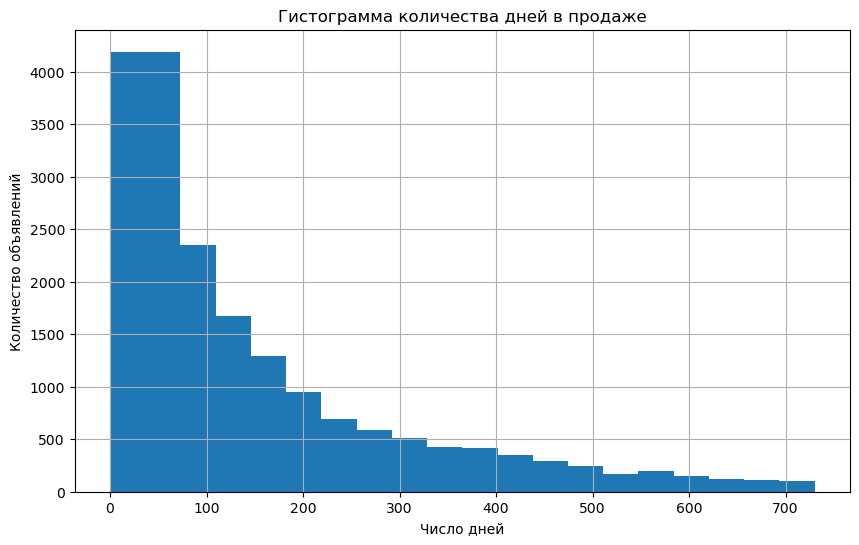

In [107]:
data_filt['days_exposition'].hist(bins=20, range=(0,730), figsize=(10,6))
plt.title('Гистограмма количества дней в продаже')
plt.xlabel('Число дней')
plt.ylabel('Количество объявлений')
plt.show()

Из полученных данных можно сказать, что быстрые продажи это те что были совершены в первые 43 дня. Среднее время продажи квартиры составляет 154 дня. Но если взять медиану - то это уже 90 дня.

Большая часть квартир продаётся в течение первых 43 дней публикации и это достаточно быстрые продажи, далее количество объявлений снижается и долгие продажи начинаются от 203 дней. 

Таким образом мы получили распределение Пуассона. Большая часть квартир продаётся в течение первых 3 месяцев публикации, далее количество объявлений снижается.

### Проведите исследовательский анализ данных

#### Изучаем параметры

In [108]:
data_filt.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_sqm,dayofweek,month,year,floor_category_digit,city_centers_nearest_km
count,22002.000000,2.200200e+04,22002.000000,22002.000000,22002.000000,22002.000000,20262.000000,22002.000000,19941.000000,22002.000000,...,7272.000000,22002.000000,8164.000000,19024.000000,22002.000000,22002.000000,22002.000000,22002.000000,22002.000000,16729.000000
mean,9.872648,5.557920e+06,56.186522,1.996137,2.695474,10.715980,32.237906,5.874466,10.051537,0.600491,...,492.209296,0.560495,528.604483,148.998686,96433.374830,2.574811,6.398873,2017.445278,1.013272,14.470321
std,5.643715,3.838944e+06,22.366641,0.940111,0.213536,6.545329,15.119155,4.848110,4.550246,0.962605,...,338.882272,0.858891,276.636458,154.825850,37794.566314,1.790964,3.488653,0.969388,0.512829,8.518777
min,0.000000,4.300000e+05,18.000000,0.000000,2.200000,1.000000,12.000000,1.000000,3.000000,0.000000,...,1.000000,0.000000,13.000000,1.000000,7962.000000,0.000000,1.000000,2014.000000,0.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,18.500000,2.000000,7.000000,0.000000,...,289.000000,0.000000,308.750000,43.000000,76000.000000,1.000000,3.000000,2017.000000,1.000000,10.000000
50%,9.000000,4.550000e+06,51.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,456.000000,0.000000,516.000000,90.000000,94418.500000,3.000000,6.000000,2018.000000,1.000000,13.000000
75%,14.000000,6.500000e+06,67.000000,3.000000,2.750000,16.000000,41.300000,8.000000,11.500000,1.000000,...,613.000000,1.000000,739.000000,203.000000,112883.250000,4.000000,10.000000,2018.000000,1.000000,16.000000
max,50.000000,4.000000e+07,150.000000,6.000000,5.000000,29.000000,128.000000,27.000000,45.000000,5.000000,...,3190.000000,3.000000,1344.000000,729.000000,848484.000000,6.000000,12.000000,2019.000000,2.000000,66.000000


**Общая площадь**


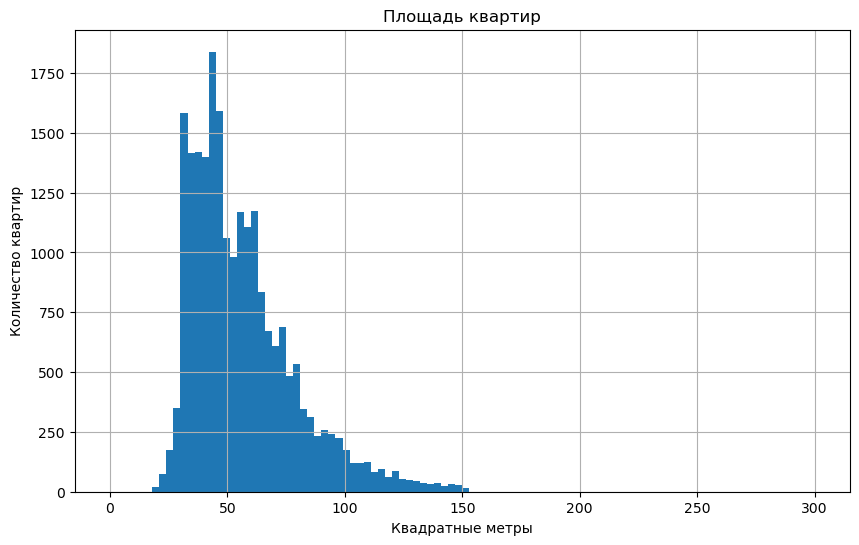

In [109]:
data_filt['total_area'].hist(bins=100, range=(0,300), figsize=(10,6))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

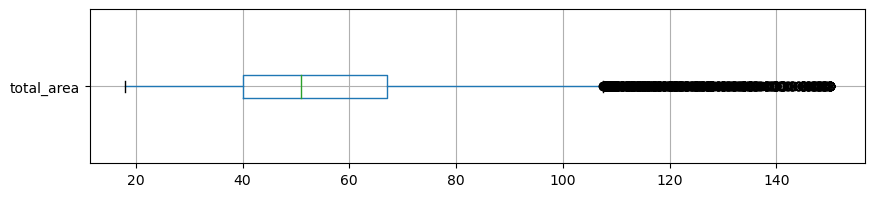

In [110]:
data_filt.boxplot(column = 'total_area',vert=False,figsize=(10,2))
plt.show()

Наблюдаем очень малое количество квартир с общей площадью более 100 кв.м. Если построить "ящик с усами" явно будет немного значений которые покажутся выбросами, но скорее всего это элитная недвижимость.

**Жилая площадь**

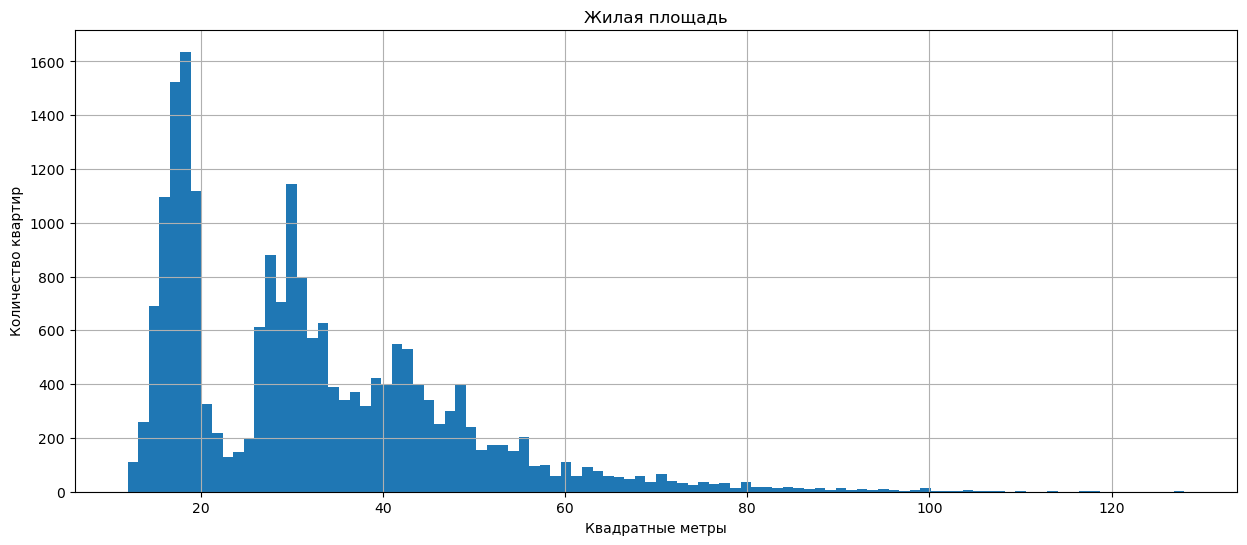

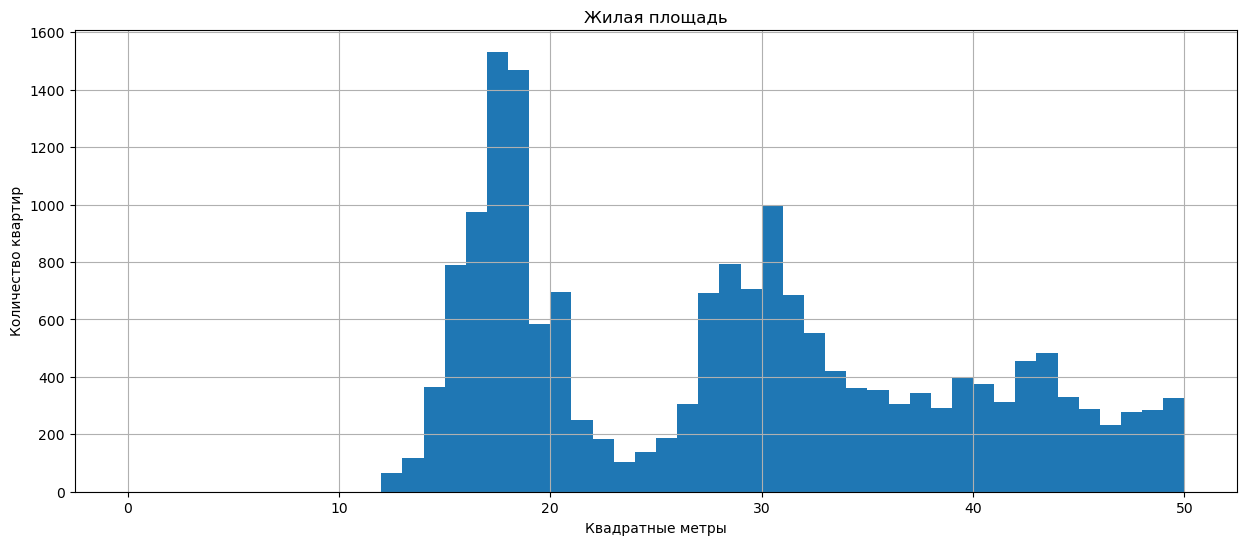

In [111]:
data_filt.hist('living_area', bins=100, figsize=(15,6));
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

data_filt.hist('living_area', bins=50, range=(0,50), figsize=(15,6));
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Наблюдаем два пика - на 18 кв.м. и на 30 кв.м. Нужно проверить, почему у нас именно два пика и почему есть явный провал около 24 кв.м.

**Площадь кухни**

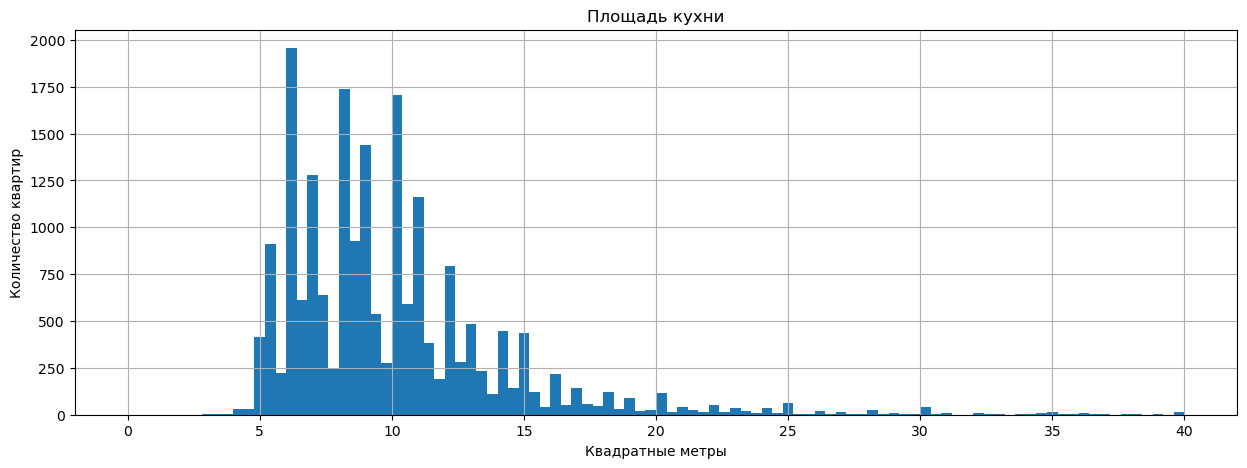

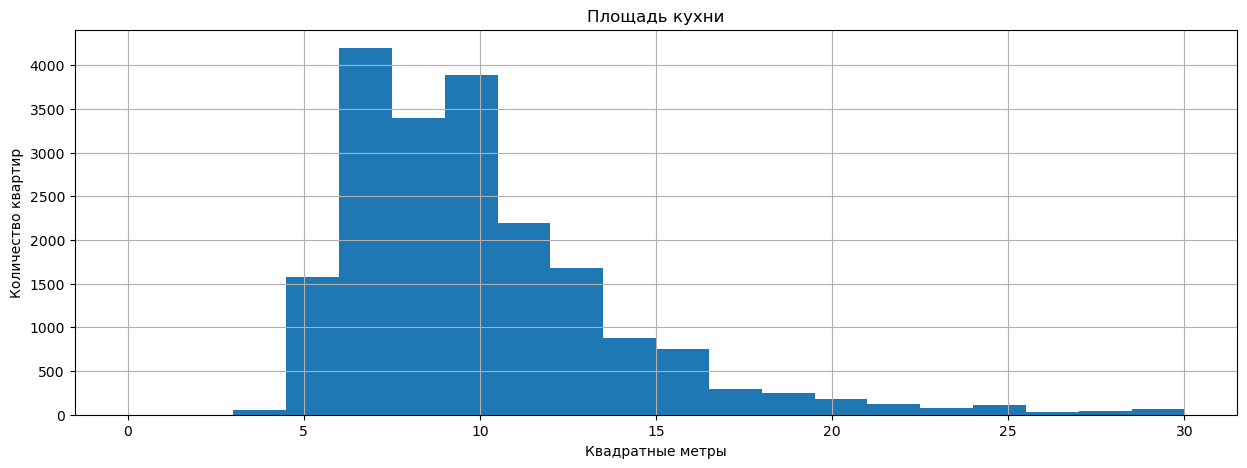

In [112]:
data_filt.hist('kitchen_area', bins=100, range=(0,40), figsize=(15,5));
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

data_filt.hist('kitchen_area', bins=20, range=(0,30), figsize=(15,5));
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Самые распространённые кухни - от 5 до 15 метров. Больше 20 метров кухни практически не встречаются. Больше 30 - единичные случаи.

**Цена объекта**

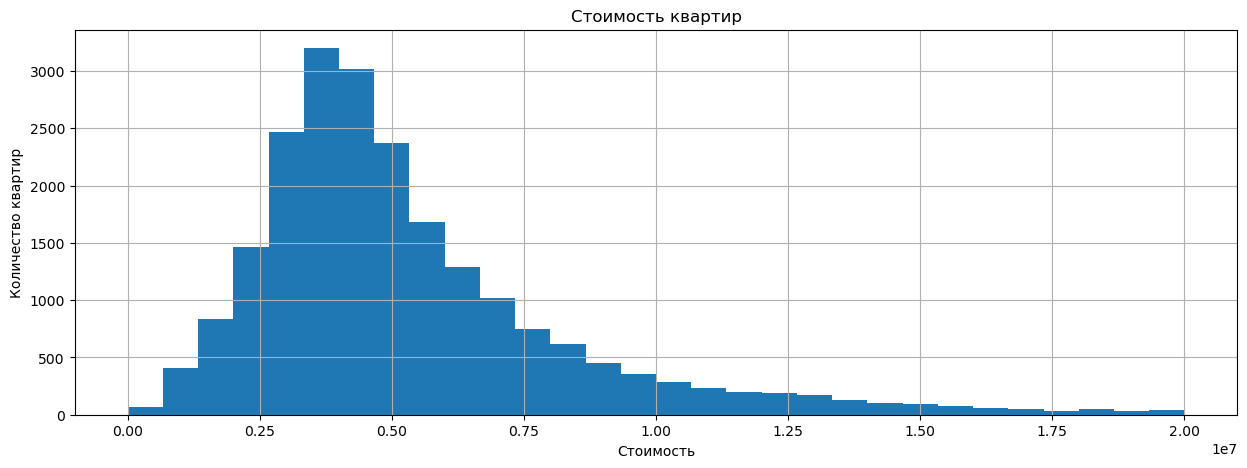

In [113]:
data_filt.hist('last_price', bins=30, range=(0,20000000), figsize=(15,5))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()

В основном стоимость квартир - порядка 5 миллионов. Больше 20 миллионов вариантов мало и они выглядят очень странно и некоторые - на порядок дороже, скорее всего это элитная недвижимость.

**Количество комнат**

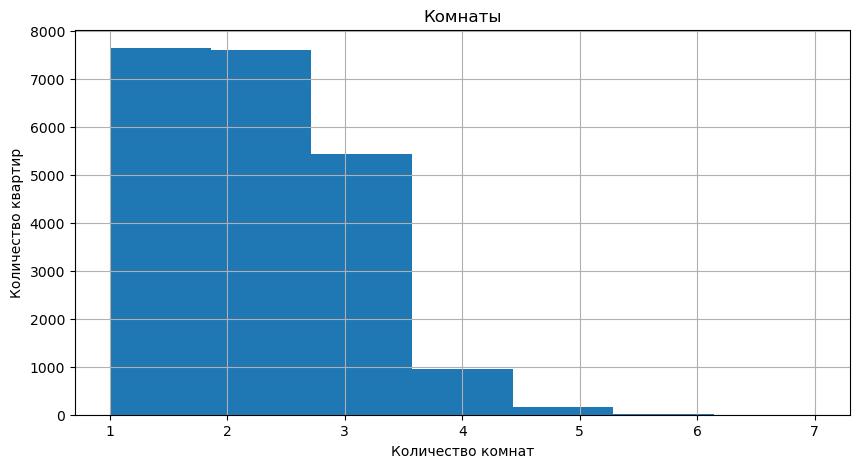

In [114]:
data_filt.hist('rooms', bins=7, range=(1,7), figsize=(10,5))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

В основном квартиры состоят из 1, 2 и 3 комнат. Есть небольшая доля 4-комнатных квартир. Варианты, где больше 7 комнат выглядят странно и подозрительно. Даже при объединении нескольких квартир в одну это подозрительно. Возможно, это отдельный дом.

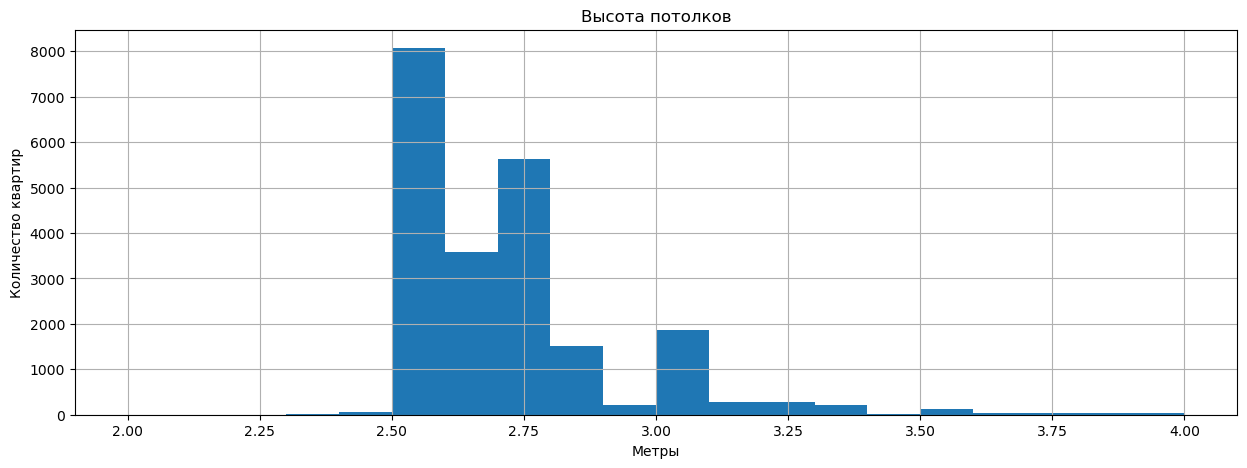

In [115]:
data_filt.hist('ceiling_height', bins=20, range=(2,4), figsize=(15,5))
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

Большинство вариантов имеют высоту потолков от 2,5 до 3 метров. Так же есть небольшое количество квартир с высотой в 4 метра, думаю для Санкт-Петербурга это вполне реально. 

**Этаж квартиры**

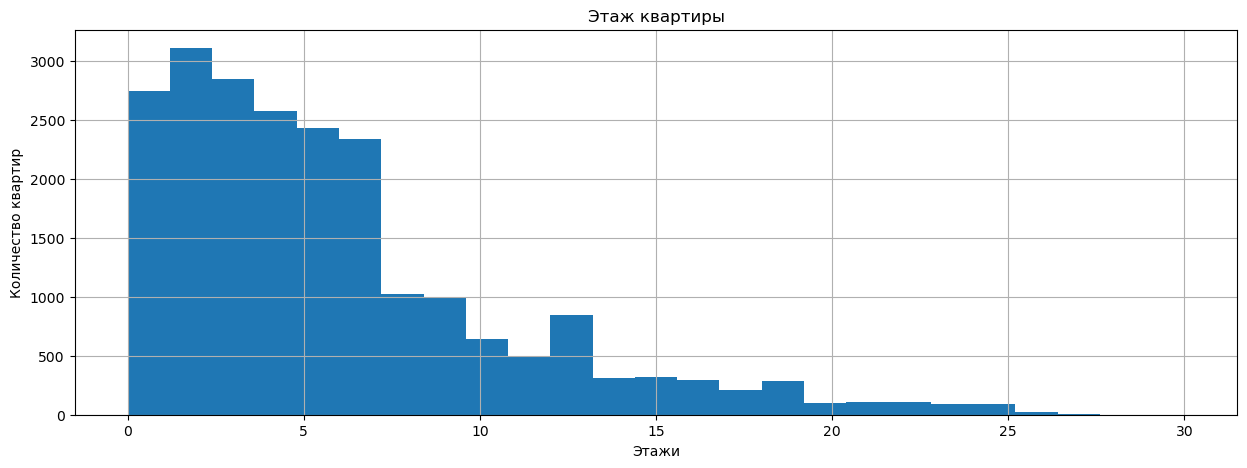

In [116]:
data_filt.hist('floor', bins=25, range=(0,30), figsize=(15,5))
plt.title('Этаж квартиры')
plt.xlabel('Этажи')
plt.ylabel('Количество квартир')
plt.show()

Больше всего квартир с 1 по 5 этаж. Чуть меньше квартир с 10 по 15 этаж.

**Тип этажа квартиры**

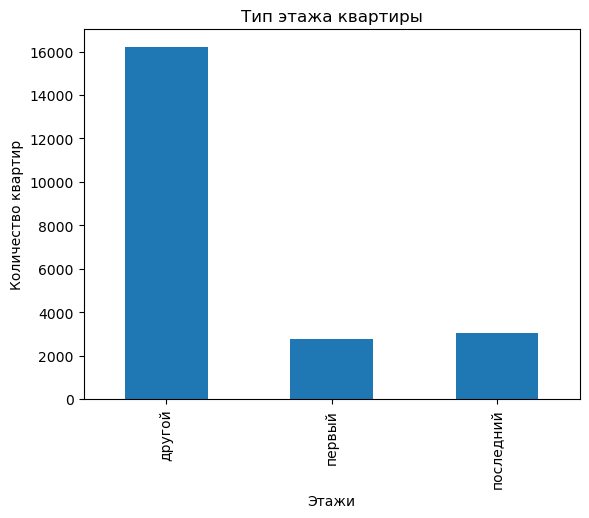

In [117]:
data_filt.groupby(by='floor_category')['floor_category'].count().plot(kind='bar', ylabel = 'count')
plt.title('Тип этажа квартиры')
plt.xlabel('Этажи')
plt.ylabel('Количество квартир')
plt.show()

Первых и последних этажей гораздо меньше относительно других. Самыми удобными этадами считаются с 3 по 5, там меньше загрязненность воздуха, не так слышен шум с улицы и удобно подниматься пешком, если нет или не работает лифт.   

**Общее количество этажей в доме**

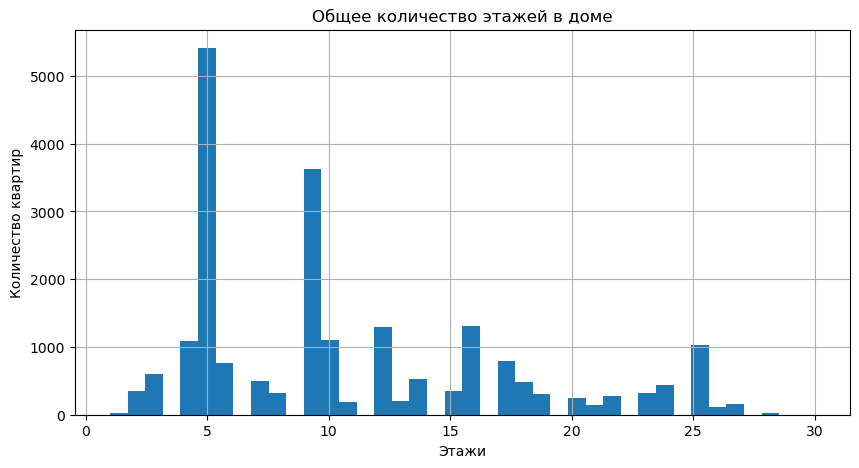

In [118]:
data_filt.hist('floors_total', bins=40, range=(1,30), figsize=(10,5))
plt.title('Общее количество этажей в доме')
plt.xlabel('Этажи')
plt.ylabel('Количество квартир')
plt.show()

Видим явные пики: 5-этажная застройка, 9-этажная застройка, и небольшие пики более высоких новостроек.

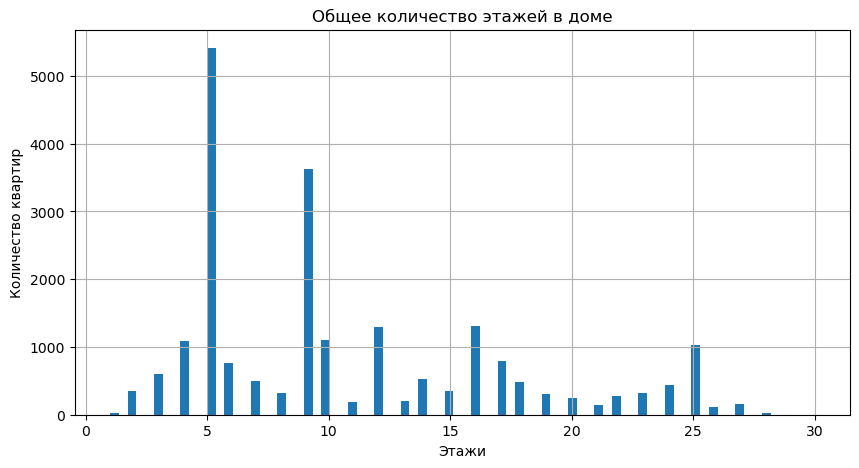

In [119]:
data_filt.hist('floors_total', bins=80, range=(1,30), figsize=(10,5))
plt.title('Общее количество этажей в доме')
plt.xlabel('Этажи')
plt.ylabel('Количество квартир')
plt.show()

**Расстояние до центра города в метрах**

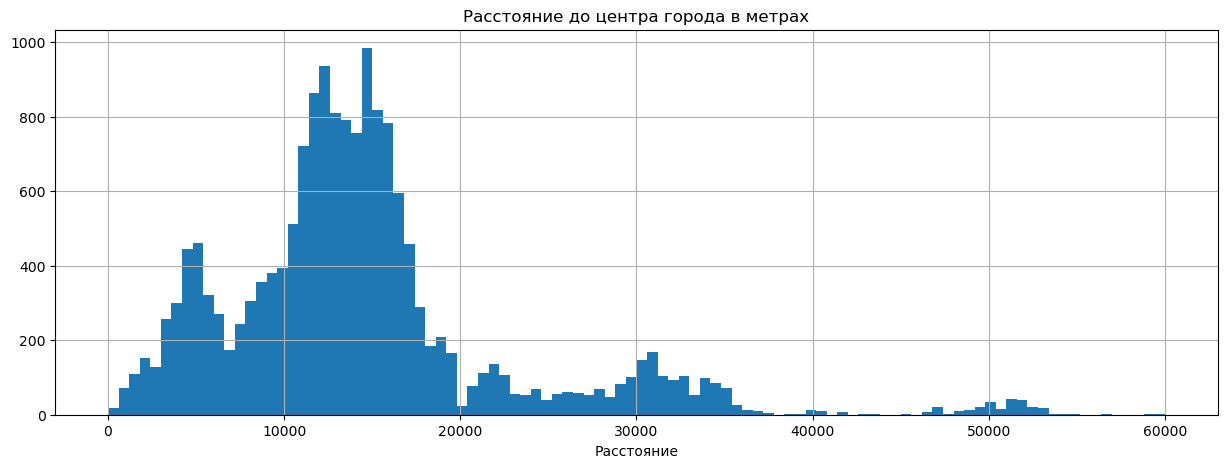

In [120]:
data_filt.hist('city_centers_nearest', bins=100, range=(1,60000), figsize=(15,5))
plt.title('Расстояние до центра города в метрах')
plt.xlabel('Расстояние')
plt.show()

Здесь наблюдаем два пика, один маленький, 5км и другой побльшой от 10 км. до 15 км. Так же есть совсем небольшие всплески на 30 км. и 50 км.

**Расстояние до ближайшего аэропорта**

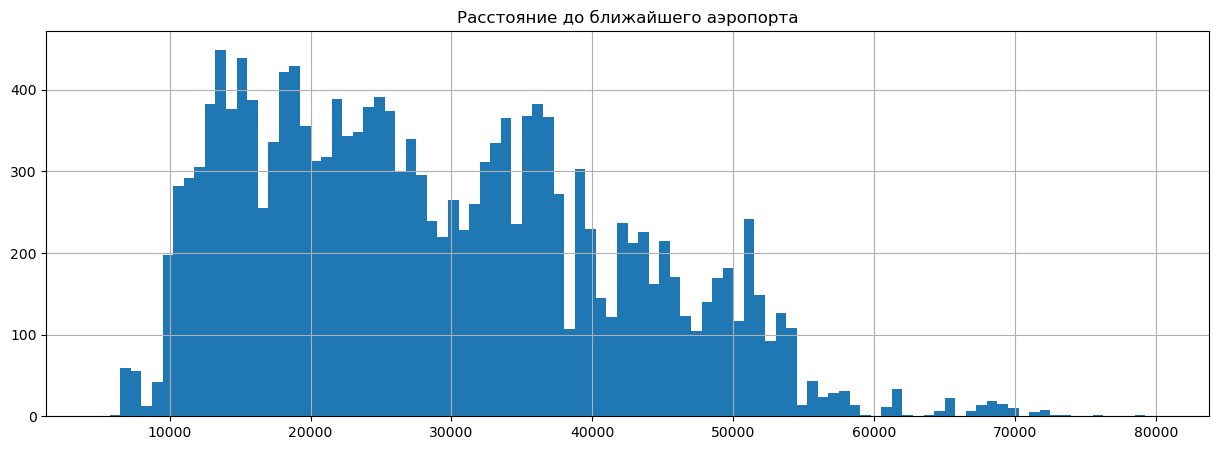

In [121]:
data_filt.hist('airports_nearest', bins=100, range=(5000,80000), figsize=(15,5))
plt.title('Расстояние до ближайшего аэропорта')
plt.show()

Основная удаленность квартир в диапозоне от 10 км до 54 км.

**Расстояние до ближайшего парка**

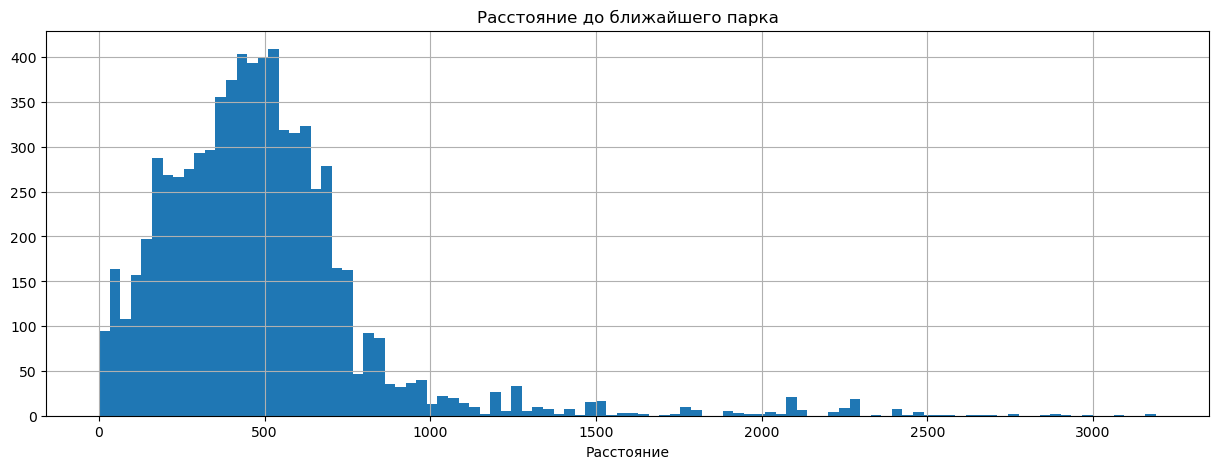

In [122]:
data_filt.hist('parks_nearest', bins=100, figsize=(15,5))
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние')
plt.show()

Судя по графику больше всего квартир с парками на расстоянии до 750м.

**День и месяц публикации объявления**

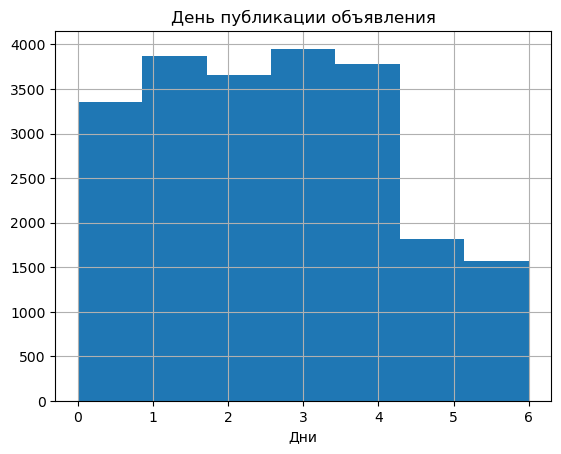

In [123]:
data_filt.hist('dayofweek', bins=7)
plt.title('День публикации объявления')
plt.xlabel('Дни')
plt.show()

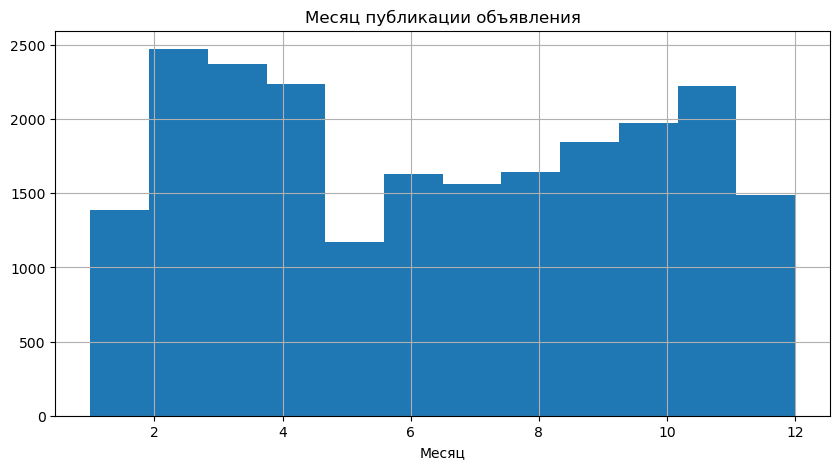

In [124]:
data_filt.hist('month', bins=12, figsize=(10,5))
plt.title('Месяц публикации объявления')
plt.xlabel('Месяц')
plt.show()

Видим провал в публикации объявлений в субботу и воскресенье, что логично. Так же видим что с февраля по апрель наблюдалосась повышенная активность. Так же был плавный рост активности с июля по ноябрь. Провалы в декабре, январе и мае.

####  Факторы влияния на общую (полную) стоимость объекта.

**Зависимость цены от общей площади**

In [125]:
correlation = data_filt['last_price'].corr(data_filt['total_area'])
print(f'Корреляция между last_price и total_area составляет: {correlation:0.2%}')

Корреляция между last_price и total_area составляет: 73.93%


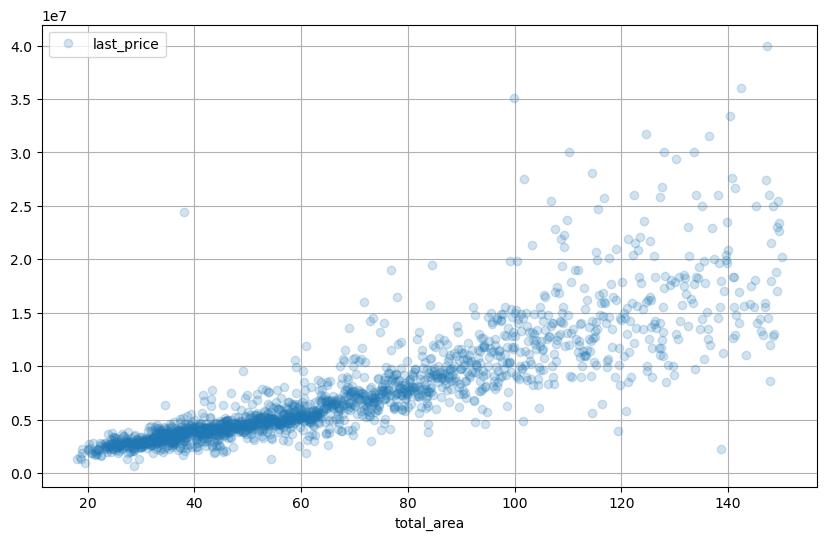

In [126]:
(data_filt
 .pivot_table(index='total_area',values='last_price',aggfunc='mean')
 .plot(grid=True, style='o', alpha=0.2, figsize=(10, 6))
);

Из графика видно, что с росто площади квартиры увеличивается её цена. Причём в сегменте маленьких квартир эта зависимость более выражена в сравнении с более крупными квартирами.

**Зависимость цены от жилой площади**

In [127]:
correlation = data_filt['last_price'].corr(data_filt['living_area'])
print(f'Корреляция между last_price и living_area составляет: {correlation:0.2%}')

Корреляция между last_price и living_area составляет: 62.07%


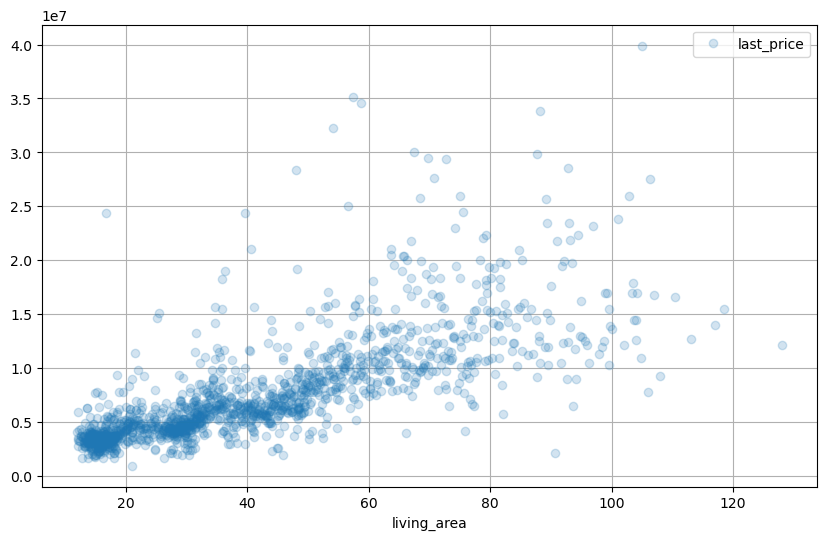

In [128]:
(data_filt
 .pivot_table(index='living_area',values='last_price',aggfunc='mean')
 .plot(grid=True, style='o', alpha=0.2, figsize=(10, 6))
);

Чем больше в квартире жилых комнат, тем больше она ценится. Из грыфика видно, что квартиры с большей жилой площадью стоят дороже, но таких квартир гораздо меньше.

**Зависимость цены от площади кухни**

In [129]:
correlation = data_filt['last_price'].corr(data_filt['kitchen_area'])
print(f'Корреляция между last_price и kitchen_area составляет: {correlation:0.2%}')

Корреляция между last_price и kitchen_area составляет: 57.14%


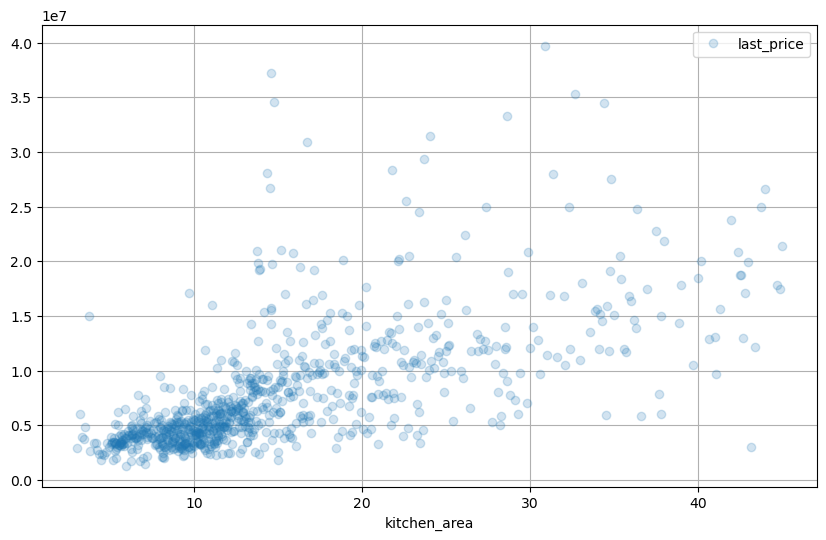

In [130]:
(data_filt
 .pivot_table(index='kitchen_area',values='last_price',aggfunc='mean')
 .plot(grid=True, style='o', alpha=0.2, figsize=(10, 6))
);

На этом графике так же видно, что цена растет от площади кухни, чем площать больше тем и выше цена. Больше всего квартир в сегменте до 15 м2. 

**Зависимость цены от количества комнат**

In [131]:
correlation = data_filt['last_price'].corr(data_filt['rooms'])
print(f'Корреляция между last_price и rooms составляет: {correlation:0.2%}')

Корреляция между last_price и rooms составляет: 43.82%


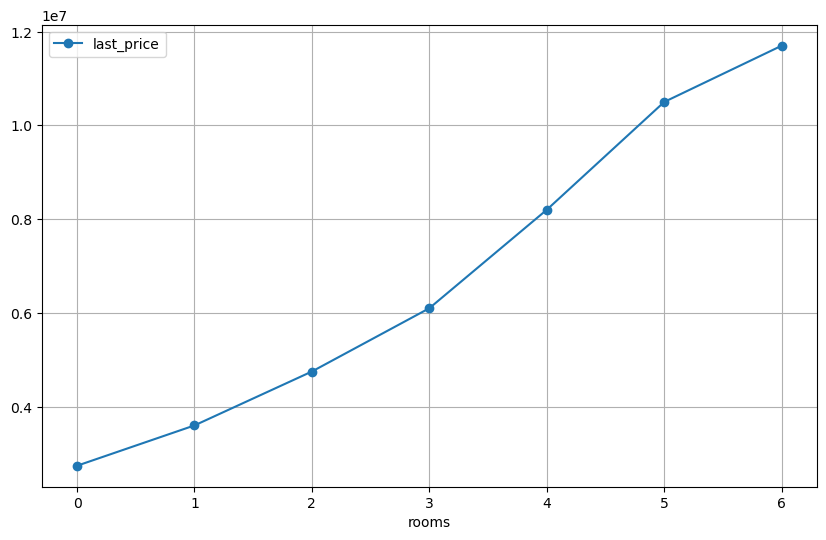

In [132]:
(data_filt
 .pivot_table(index='rooms',values='last_price',aggfunc='median')
 .plot(grid=True, style='o-', figsize=(10,6))
);

Видим чёткую зависимость - чем больше в квартире комнат, тем она дороже. Видим не большое снижение цен на квартиры где количество комнат превышает 5, думаю это связано с тем что на такие квартиры редкий спрос. 

**Зависимость цены от типа этажа**

In [133]:
correlation = data_filt['last_price'].corr(data_filt['rooms'])
print(f'Корреляция между last_price и rooms составляет: {correlation:0.2%}')

Корреляция между last_price и rooms составляет: 43.82%


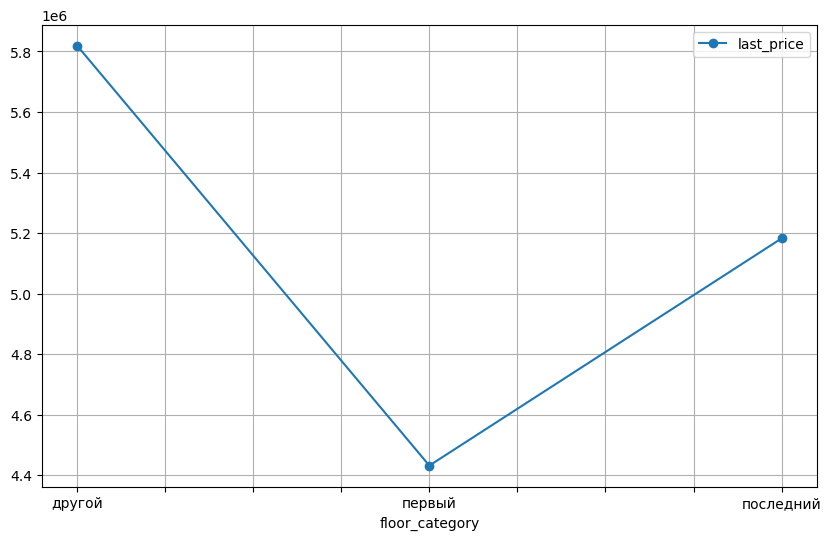

In [134]:
(data_filt
 .pivot_table(index='floor_category',values='last_price',aggfunc='mean')
 .plot(grid=True, style='o-', figsize=(10, 6))
)
plt.show() 

Наблюдаем зависимость - квартиры на первом этаже дешевле всего, квартиры на последнем этаже более ценны. Наиболее высокую цену имеют квартиры на "средних" этажах.

**Зависимость от даты размещения**

Корреляция стоимости от дня размещения объявления:

In [135]:
correlation = data_filt['last_price'].corr(data_filt['dayofweek'])
print(f'Корреляция между last_price и dayofweek составляет: {correlation:0.2%}')

Корреляция между last_price и dayofweek составляет: -1.09%


Построим график на котором видна зависимость от дня размещения объявления

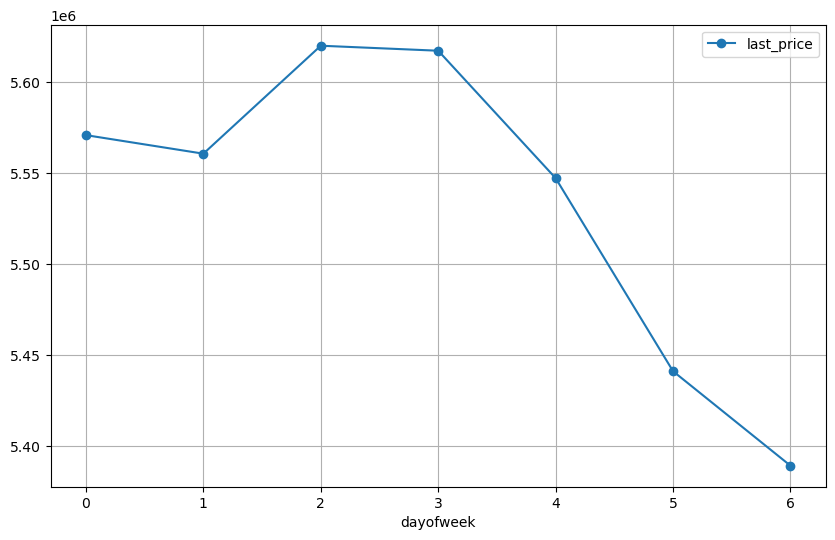

In [136]:
(data_filt
 .pivot_table(index='dayofweek', values='last_price', aggfunc='mean')
 .plot(kind='line', style='o-', grid=True, figsize=(10, 6))
)
plt.show()

Наблюдаем некоторое удорожание объявлений в середине недели и удешевление ближе к выходным.

Корреляция стоимости от месяца размещения объявления:

In [137]:
correlation = data_filt['last_price'].corr(data_filt['month'])
print(f'Корреляция между last_price и month составляет: {correlation:0.2%}')

Корреляция между last_price и month составляет: -0.32%


Построим график на котором видна зависимость от месяца размещения объявления

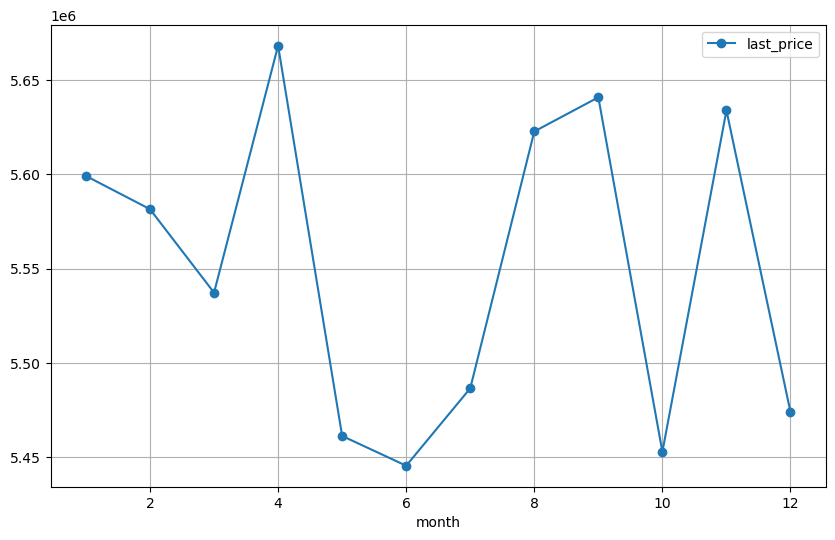

In [138]:
(data_filt
 .pivot_table(index='month', values='last_price', aggfunc='mean')
 .plot(kind='line', style='o-', grid=True, figsize=(10, 6))
);

Объявления размещеные в октябре имеют наименьшую цену, тогда как самые высокие цены на квартиры в сентябре и ноябре. Так же снижение цен наблюдается в марте,июле и декабре, но оно не на столько низкое как в октябре. 

Корреляция стоимости от года размещения объявления:

In [139]:
correlation = data_filt['last_price'].corr(data_filt['year'])
print(f'Корреляция между last_price и year составляет: {correlation:0.2%}')

Корреляция между last_price и year составляет: -0.14%


Построим график на котором видна зависимость от года размещения объявления

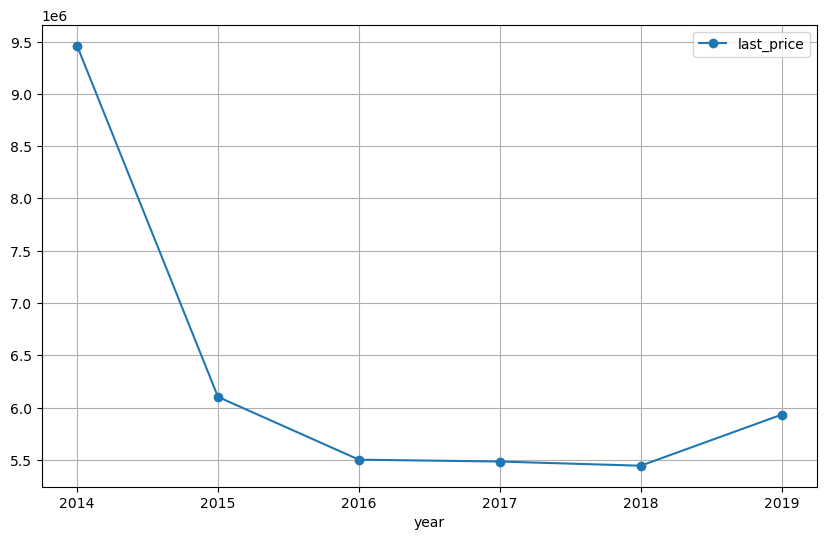

In [140]:
(data_filt
 .pivot_table(index='year', values='last_price', aggfunc='mean')
 .plot(kind='line', style='o-',grid=True, figsize=(10, 6))
);

In [141]:
temp_column = 'year'
display(data_filt.pivot_table(index=temp_column, values='last_price', aggfunc=['count','min','mean','median','max']))

,count,min,mean,median,max
,last_price,last_price,last_price,last_price,last_price
year,,,,,
2014,53,1300000,9.460229e+06,7580000,29999000
2015,712,650000,6.102873e+06,4980000,39990000
2016,2397,490000,5.502884e+06,4400000,39000000
2017,7832,450000,5.485006e+06,4450000,40000000
2018,8239,430000,5.444981e+06,4500000,40000000
2019,2769,430000,5.933025e+06,5000000,39900000


In [142]:
temp_column = 'year'
display(data_filt.pivot_table(index=temp_column, values='total_area', aggfunc=['count','min','mean','median','max']))

,count,min,mean,median,max
,total_area,total_area,total_area,total_area,total_area
year,,,,,
2014,53,34.69,81.696038,80.00,145.2
2015,712,20.67,61.575295,56.95,149.0
2016,2397,18.90,57.269399,52.00,150.0
2017,7832,18.00,56.332792,51.00,150.0
2018,8239,18.00,55.274571,50.00,150.0
2019,2769,18.00,55.674969,51.00,150.0


In [143]:
data_years = data_filt.query('floor_category == "другой"')
temp_column = 'year'
display(data_years.pivot_table(index=temp_column, values='last_price', aggfunc=['count','min','mean','median','max']))

,count,min,mean,median,max
,last_price,last_price,last_price,last_price,last_price
year,,,,,
2014,38,1700000,9.945452e+06,8392628,29999000
2015,492,650000,6.439856e+06,5219500,39990000
2016,1733,500000,5.754832e+06,4600000,39000000
2017,5796,490000,5.720613e+06,4600000,40000000
2018,6092,450000,5.716354e+06,4700000,40000000
2019,2061,530000,6.231229e+06,5200000,39900000


Видим значительное снижение цен на квартиры после 2014 года, к 2019 году намечается незначительный подъём. Так же видно что площадь квартир с каждым годом уменьшалась. В 2014 году колличество продаваемых квартир было гораздо меньше, чем в период с 2016 по 2018. На рынок было предложенно меньше квартир, следовательно спрос был выше и цены тоже. Квартиры были просторнее, что тоже влияет на спрос. 

Сезонность так же влияет на стоимость квартир, летом и весной жилье в эксплуатацию сдают больше, соответственно рынок предлагает больше жилья и цена из-за этого дешевле, а зимой предложений меньше и цена может быть выше. 
Инвестиции в жилищное строительство стали более выгодны, что привлекло в эту область застройщиков и объем жилищного строительства с каждым годом рос отсюда и значительный рост количества обьявлений по годам. 

В период с 2016 по 2018 цена на квартиры на средних этажах была примерно одинаковая

**Вывод по зависимости цены от различных факторов**  
Стоимость квартир больше всего зависит от следующих факторов:
- Площадь квартиры (больше - дороже)
- Жилая площадь (больше - дороже)
- Площадь кухни (больше - дороже)
- Количество комнат (больше - дороже)
- Год размещения

Менее значимая зависимость:
- Этаж квартиры (первый, последний или "средний")

Необычные и интересные зависимости:
- День размещения (снижение к выходным)
- Месяц размещения 

#### Cредняя цена одного квадратного метра в топ-10 населенных пунктах

Создадим таблицу, включающую 10 наиболее распространённых регионов

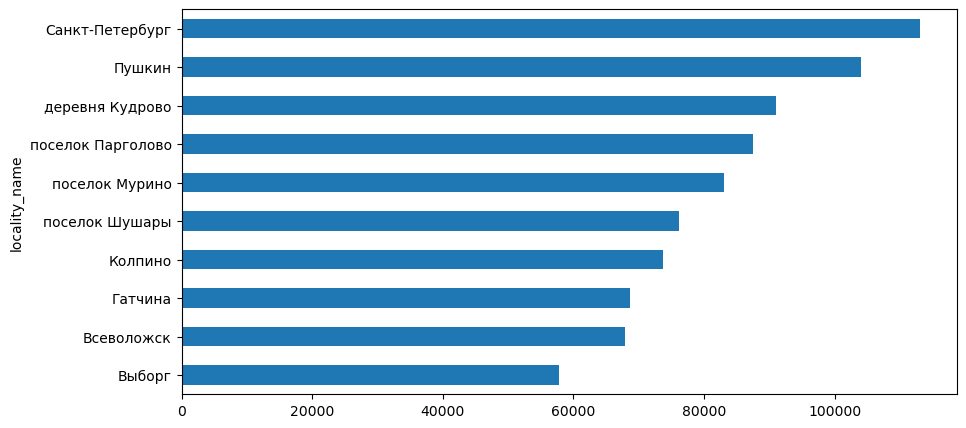

In [144]:
top_10 = data_filt.pivot_table(index='locality_name', values=['last_price','total_area'] ,aggfunc=['sum','count'])
top_10.columns=['last_price_sum','total_area_sum','last_price_count','total_area_count']
top_10.pop('total_area_count')
top_10.sort_values(by=['last_price_count'],ascending=False, inplace=True)
top_10 = top_10.iloc[:10]
top_10['price_per_sq_m'] = top_10['last_price_sum']/top_10['total_area_sum']
top_10.sort_values(by=['price_per_sq_m'],ascending=True, inplace=True)
top_10['price_per_sq_m'].plot(kind='barh', figsize=(10,5));

In [145]:
top_10.sort_values('price_per_sq_m', ascending=False)

,last_price_sum,total_area_sum,last_price_count,price_per_sq_m
locality_name,,,,
Санкт-Петербург,9.611919e+10,850562.43,14431,113006.619946
Пушкин,2.014298e+09,19361.90,341,104034.127023
деревня Кудрово,1.183440e+09,13007.94,278,90978.308249
поселок Парголово,1.401331e+09,16028.45,311,87427.758704
поселок Мурино,1.901976e+09,22899.01,523,83059.315665
поселок Шушары,1.733142e+09,22771.01,419,76111.775411
Колпино,1.274730e+09,17289.32,331,73729.345399
Гатчина,1.019523e+09,14852.62,292,68642.661025
Всеволожск,1.456639e+09,21451.33,383,67904.366070


Наибольшая средняя стоимость квадратного метра в Санкт-Петербурге. Затем идёт Пушкин, далее идут районы, фактически являющиеся Санкт-Петербургом и непосредственно к нему примыкают. Из топ-10 наименьшая стоимость в Гатчине и Всеволожске, из которых далеко ехать до Санкт-Петербурга, а также неболшой по численности населения Выборг, расположенный на большом расстоянии от Санкт-Петербурга.

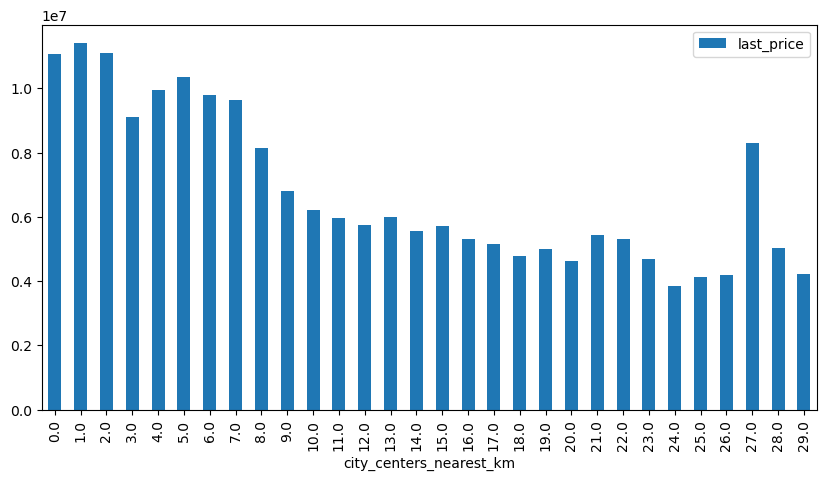

In [146]:
(data_filt[data_filt['locality_name']=='Санкт-Петербург']
    .pivot_table(
        index='city_centers_nearest_km',
        values='last_price',
        aggfunc='mean')
    .plot(kind='bar', figsize=(10,5))
);

Центральная зона - это 7 км и меньше. Дальше 7 км средняя цена на квартиры резко снижается.
Цена начинает спадать на расстоянии от 8 км. до 27 км.
Видим пик на 27км, его сложно объяснить, возможно это недвижимость в "особом" районе.

**Изучение 27 км.**

Сделаем срез по Санкт-Петербургу на 27 км.

In [147]:
data_spb_center_27km = data_filt.query('city_centers_nearest_km == 27 & locality_name == "Санкт-Петербург"')

In [148]:
data_spb_center_27km.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,cost_per_sqm,dayofweek,month,year,floor_category,floor_category_digit,city_centers_nearest_km
748,13,14350000,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,0,NaN,128.0,193918,1,11,2017,другой,1,27.0
5961,6,2250000,32.0,2018-02-27,1,2.70,2,16.5,2,False,...,0,NaN,178.0,70312,1,2,2018,последний,2,27.0


Посмотрим на распределение значений

In [149]:
data_spb_center_27km['last_price'].describe()

count    2.000000e+00
mean     8.300000e+06
std      8.555992e+06
min      2.250000e+06
25%      5.275000e+06
50%      8.300000e+06
75%      1.132500e+07
max      1.435000e+07
Name: last_price, dtype: float64

Вывод: На 27 км. 2 квартиры, одна из них слишком дорогая и медианное значение больше чем в 2 раза, это и повлияло на выброс. 

#### Изучим квартиры в центре

Сделаем срез данных опираясь на график, примем границу центра равную от 2км. до 5км. от центра Санкт-Петербурга. Изучим квартиры в этом районе. 

In [150]:
data_spb_center = data_filt.query('2 <= city_centers_nearest_km <= 5')

Изучим параметры площади, цены, количества комнат и высоту потолков в квартирах в центре.

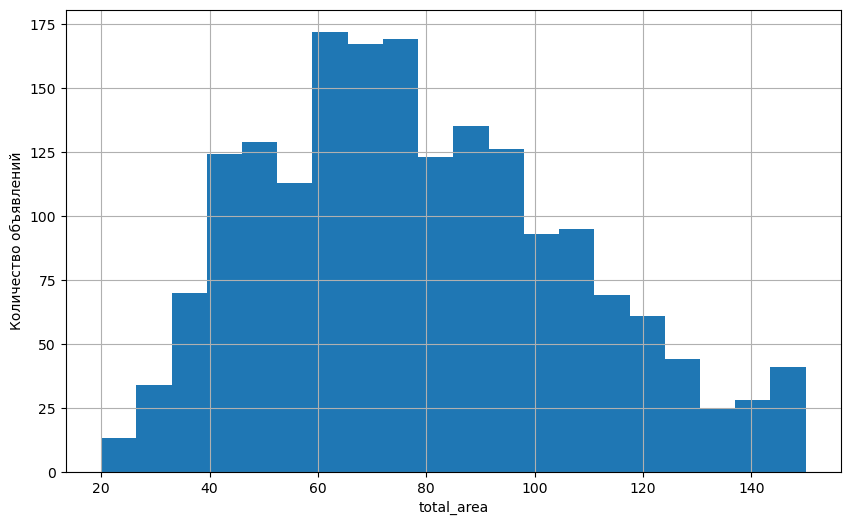

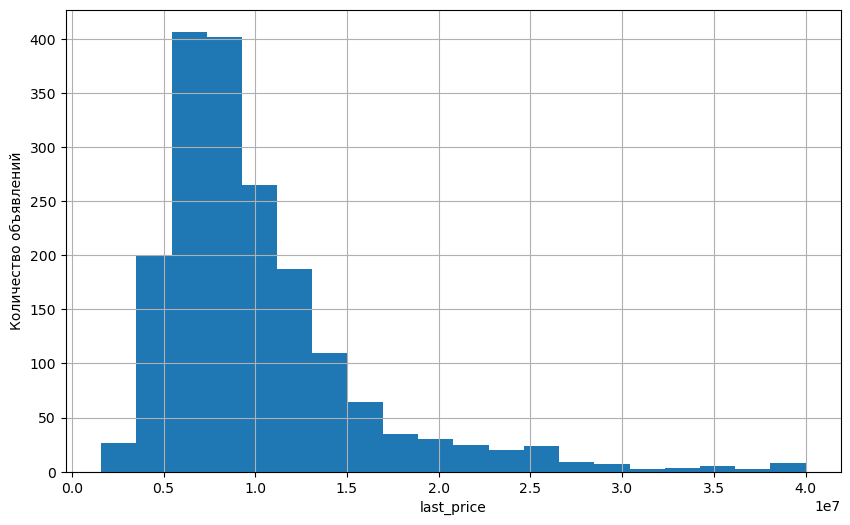

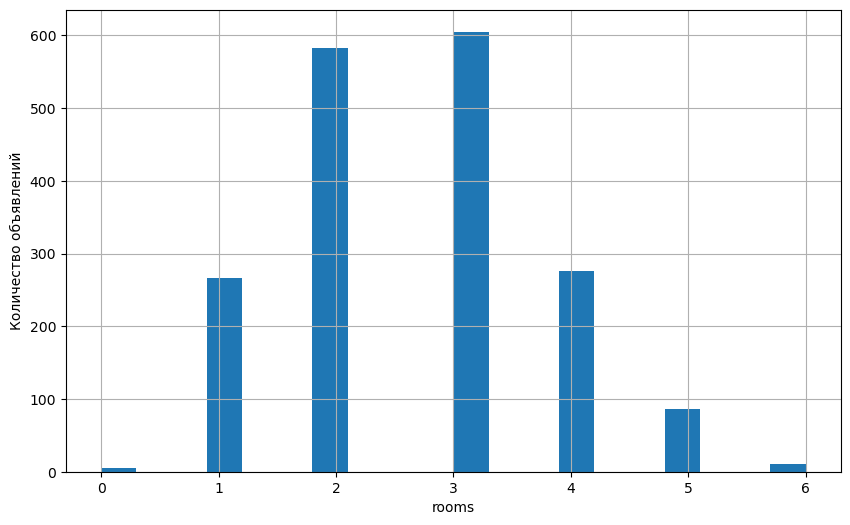

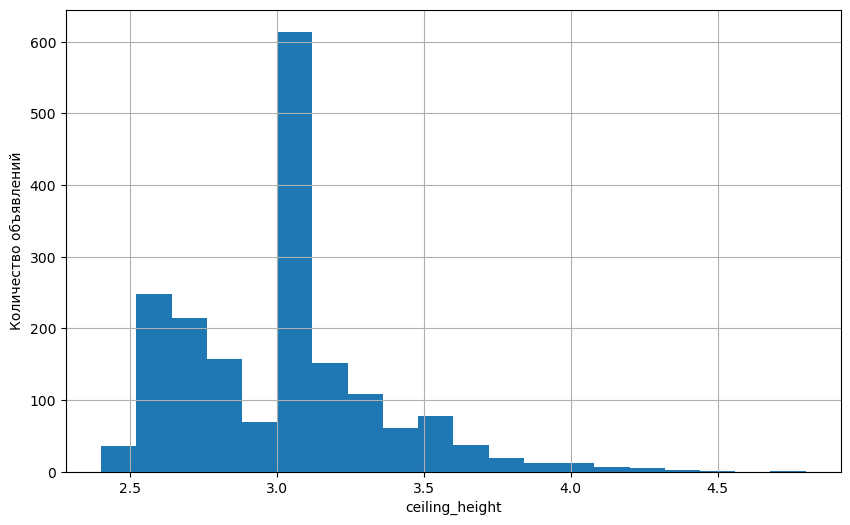

In [151]:
column_list_center_hist = ['total_area','last_price','rooms','ceiling_height']

for column in column_list_center_hist:
    data_spb_center[column].hist(bins=20,figsize=(10,6))
    plt.xlabel(column)
    plt.ylabel('Количество объявлений')
    plt.show()

Сравним полученные результаты по квартирам в диапозоне от 3 до 5 км. до центра Санкт-Петербурга со всей Ленинградской областью:
1. Средняя площадь квартир от 25 до 90 м2, самая распрастраненная площадь от 40 до 80 м2.
2. Квартиры в центре дороже - наиболее распространены от 5 до 10 млн руб., пик приходится на 6-7 млн руб.
3. 2- и 3-комнатные квартиры в центре более популярны, чем 1-комнатные, тогда как на общем графике большей популярностью пользовались 1- и 2-комнатные квартиры. 
4. Основная масса квартир имеет потолки 2.7 метра, однако доля 3-метровых заметно выше. Думаю это связано с тем что в центре располагаются дома старого фонда.  Постройками старого фонда считаются здания в Петербурге, которые возводились в 18 веке и  высота потолков в таких домах иногда достигает 4,2 метров, в нашем случае больше 3-хметровых потолков. 


**Зависимость цены в центре**

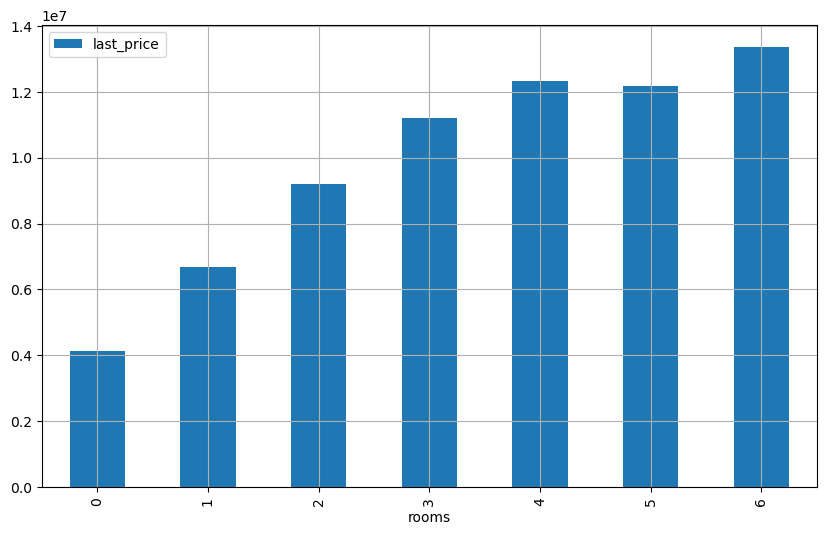

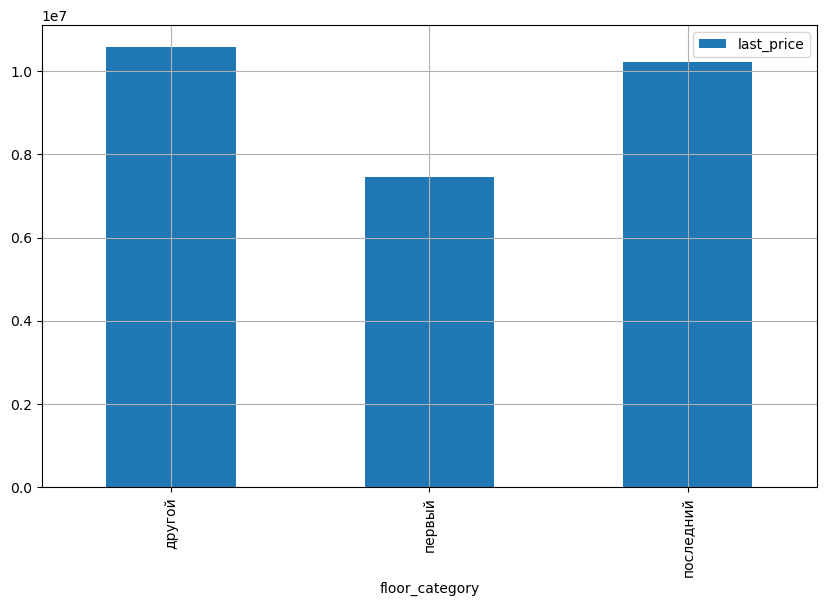

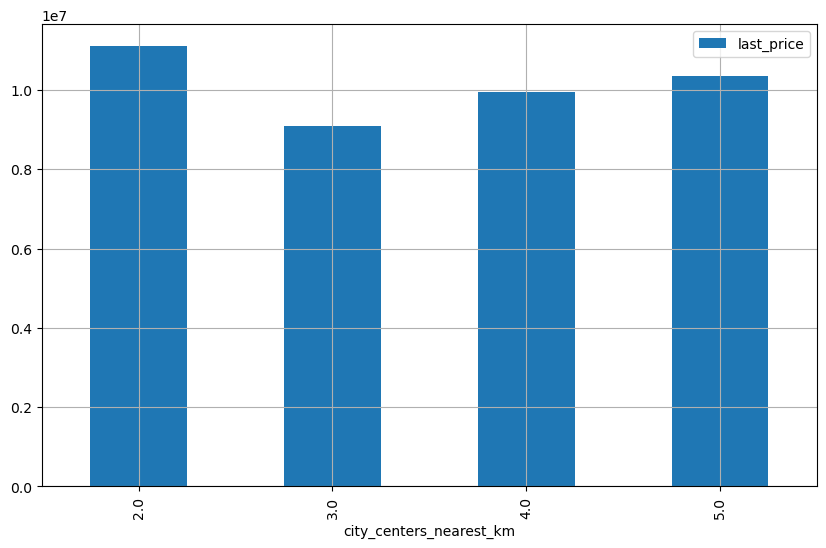

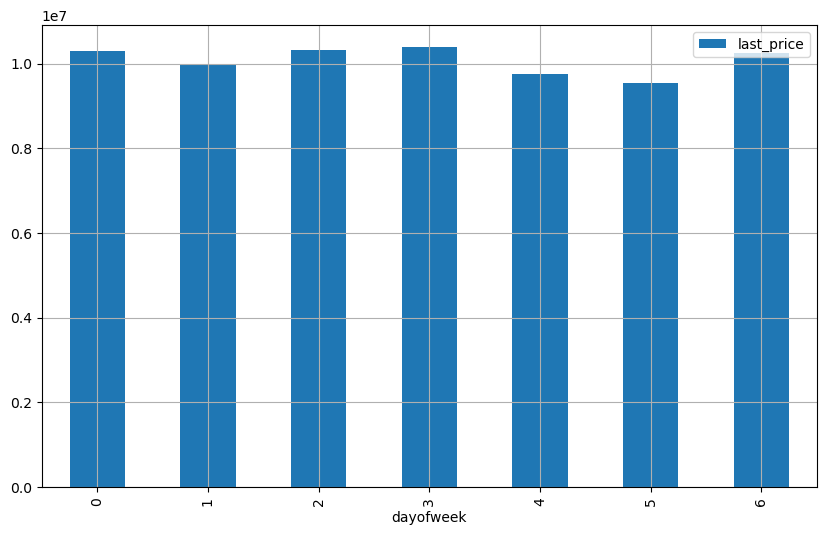

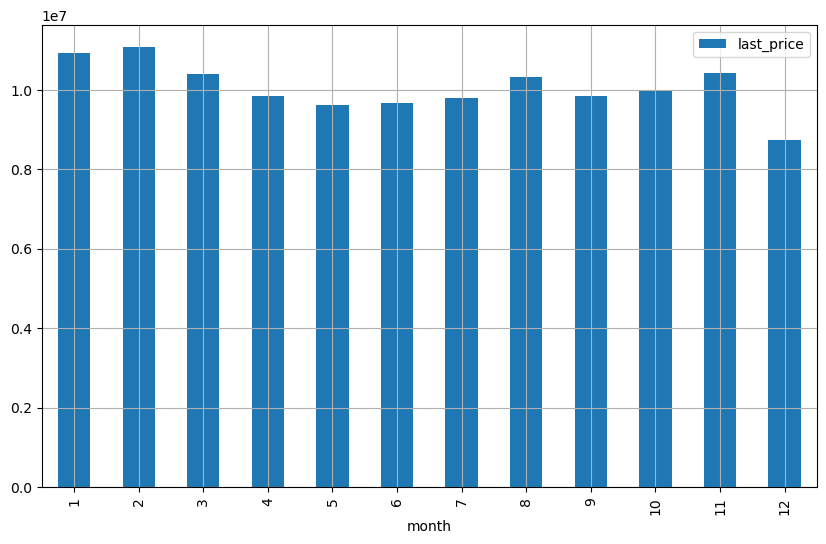

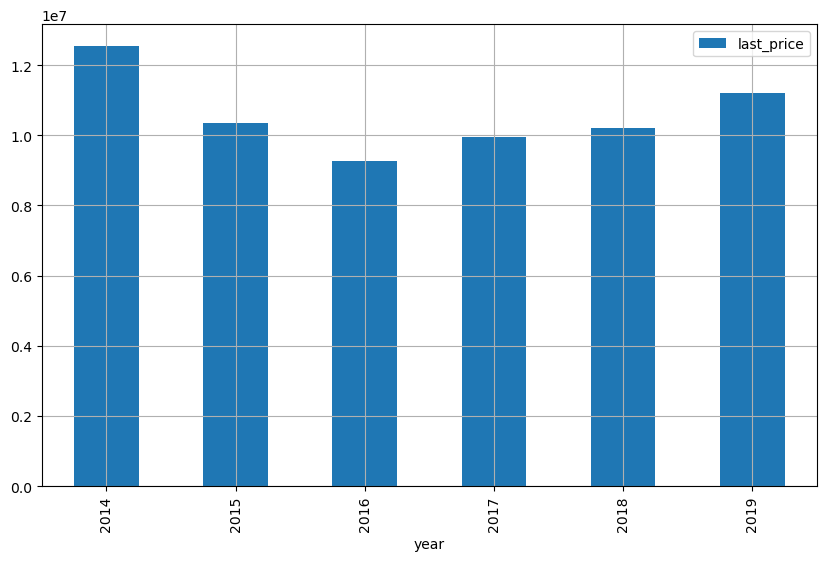

In [152]:
column_list_center_factors = ['rooms','floor_category', 'city_centers_nearest_km', 'dayofweek','month','year']

for column in column_list_center_factors:
    (data_spb_center.pivot_table(index=column, values='last_price', aggfunc='mean').
     plot(kind='bar', grid=True, figsize=(10, 6)))
    plt.show()

In [153]:
temp_column = 'floor_category'
display(data_spb_center.pivot_table(index=temp_column, values='last_price', aggfunc=['count','min','mean','median','max']))

,count,min,mean,median,max
,last_price,last_price,last_price,last_price,last_price
floor_category,,,,,
другой,1267,1800000,1.059042e+07,8950000,40000000
первый,238,1600000,7.452016e+06,6700000,25000000
последний,326,3500000,1.022624e+07,8750000,39000000


In [154]:
temp_column = 'year'
display(data_spb_center.pivot_table(index=temp_column, values='last_price', aggfunc=['count','min','mean','median','max']))

,count,min,mean,median,max
,last_price,last_price,last_price,last_price,last_price
year,,,,,
2014,6,7500000,1.253800e+07,11364000,19800000
2015,95,3599000,1.035505e+07,8600000,39990000
2016,233,1800000,9.279748e+06,8280000,30000000
2017,704,2176000,9.947711e+06,8500000,40000000
2018,589,1600000,1.021378e+07,8600000,40000000
2019,204,3150000,1.120176e+07,9300000,39900000


**Вывод по зависимости цены:**
1. Зависимость цены от колличества комнат мало меняется при рассмотрении в центре и области. 
2. Квартиры на последнем этаже ценятся примерно так же, как и на "других" этажах. Но количество объявлений "других" этажей больше.
3. Падение стоимости квартир после 2014 года примерно на 30-40% менее значительное, чем в области. В 2014 году было гораздо меньше обьявлений в этом районе.

#### Квартиры на 3 и 5 км от центра

Расчет для 3 км от центра

In [155]:
data_spb_center_3km = data_filt.query('city_centers_nearest_km == 3')
temp_column = 'floor_category'
display(data_spb_center_3km.pivot_table(index=temp_column, values='last_price', aggfunc=['count','min','mean','median','max']))


,count,min,mean,median,max
,last_price,last_price,last_price,last_price,last_price
floor_category,,,,,
другой,178,2385000,9.533589e+06,8284500,30000000
первый,50,2800000,7.077398e+06,5700000,25000000
последний,67,3500000,9.446216e+06,8200000,25000000


Расчет для 5 км от центра

In [156]:
data_spb_center_5km = data_filt.query('city_centers_nearest_km == 5')
temp_column = 'floor_category'
display(data_spb_center_5km.pivot_table(index=temp_column, values='last_price', aggfunc=['count','min','mean','median','max']))

,count,min,mean,median,max
,last_price,last_price,last_price,last_price,last_price
floor_category,,,,,
другой,545,1800000,1.070036e+07,8900000,39900000
первый,73,2740000,7.302616e+06,6590000,21501000
последний,106,3550000,1.058973e+07,8950000,27500000


Вывод: На 3км в целом меньше продавалось квартир. Цена на квартиры примерно одинаковая. На 3 км расположен в основном старый жилой фонд, реки, каналы, мосты, жилых квартир почти нет, в основном правительтвенные учереждения, рестораны, магазины и тд. Поэтому такой провал на 3 км. 

### Общий вывод

 В ходе работы мы смогли проаназилировать квартиры большинства регионов и вывести явные закономерности.
 1) Срок продажи квартиры.
   * Большая часть квартир продаётся в течение первых 3 месяцев публикации, далее количество объявлений снижается.
   * Есть большое число квартир, проданных всего за несколько дней после публикации.  Можно сказать, что быстрые продажи это те что были совершены в первые 42 дня.
   * Также есть варианты, которые продавались достаточно долго начиная от 7 месяцев.  
       
2) Цена квартиры напрямую зависит от площади квартиры. Чем больше площать, тем дороже квартира. Это напрямую относится и к жилой площади тоже, чем больше в квартире жилых комнат, тем больше она ценится.

3) Цена растет от площади кухни, чем площать больше тем и выше цена. Больше всего квартир в сегменте до 15 м2.
    
4) Цена зависит от количества комнат. Чем больше в квартире комнат, тем она дороже. Цена снижается на квартиры где количество комнат 6 и более.

5) Цена квартиры зависит от того на каком этаже она находится (на первом продается хуже чем на другом или последнем)
          
6) Цена квартиры зависит от дистанции до центра

7) Цена зависит от даты размещения. Так обьявление опубликованное в сентябре или ноябре, в середине недели были с более высокой ценой. Так же был замечен спад цен на квартиры с 2014 года. Этот спад обоснован количеством объявлений, разной площадью, сезонностью и расположением квартир. 
  
8) Также в ходе анализа мы выяснили что сегмент квартир в центре продается дороже чем вне центра. Цена начинает спадать на расстоянии от 8 км. от центра Санкт-Петербурга.